
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">** Task 11: ML (Classification Algorithm I)
 🔍📊🤖 **</h1>
</div>
These exercises cover a range of classification problems, ensuring that you gain practical experience in both implementing and evaluating logistic regression and decision tree classifiers.


__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

<h1> <center><span style="background-color: #D2B48C; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: underlined;">Task: 🔍📊 </span></center></h1>


**Deadline: 22 July 2024**
###### ___________________  

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________


1. **Predicting Diabetes Onset Using Logistic Regression** 🩺

   **Dataset:**
   Diabetes Dataset

   **Preprocessing Steps:**
   - Handle missing values if any.
   - Standardize features.
   - Encode categorical variables if any.

   **Task:**
   Implement logistic regression to predict diabetes onset and evaluate the model using accuracy, precision, and recall.

2. **Classifying Iris Species Using Decision Trees** 🌿

   **Dataset:**
   Iris Dataset

   **Preprocessing Steps:**
   - Handle missing values if any.
   - Standardize features.
   - Encode categorical variables if any.

   **Task:**
   Implement a decision tree classifier to classify iris species and evaluate the model using confusion matrix and accuracy.

3. **Predicting Titanic Survival Using Logistic Regression** 🚢

   **Dataset:**
   Titanic Dataset

   **Preprocessing Steps:**
   - Handle missing values (e.g., fill missing ages with median).
   - Encode categorical variables (e.g., one-hot encoding for embarked and gender).
   - Standardize numerical features.

   **Task:**
   Implement logistic regression to predict survival on the Titanic and evaluate the model using ROC-AUC.

4. **Classifying Emails as Spam Using Decision Trees** 📧

   **Dataset:**
   Spam Email Dataset

   **Preprocessing Steps:**
   - Handle missing values if any.
   - Standardize features.
   - Encode categorical variables if present.

   **Task:**
   Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.

5. **Predicting Customer Satisfaction Using Logistic Regression** 😊

   **Dataset:**
   Customer Satisfaction Dataset

   **Preprocessing Steps:**
   - Handle missing values (e.g., fill missing values with median).
   - Encode categorical variables (e.g., one-hot encoding for region).
   - Standardize numerical features.

   **Task:**
   Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.




---



## **Import Libraries:**

In [25]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True
sns.set(color_codes=True)
sns.set_style('darkgrid')

from sklearn.datasets import load_iris # load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category =FutureWarning)

## **Acquiring & Loading Datasets:**



Dataset used:

- [Diabetes Prediction dataset
](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

- [Titanic Dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

- [Spam Email Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/spam-email)

- [Predict Restaurant Customer Satisfaction Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-customer-satisfaction-dataset)



In [ ]:
diabetes_df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
display(iris_df.head())

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

In [ ]:
titanic_df = sns.load_dataset('titanic')
# type(titanic)
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
mail_spam_df = pd.read_csv('/content/spam.csv')

In [ ]:
custmr_satisfaction_df = pd.read_csv('/content/restaurant_customer_satisfaction.csv')



---




## **1. Predicting Diabetes Onset Using Logistic Regression 🩺:**

This is Binary Classification Problem



#### Data Understanding:

Gaining insights into the data we have:

In [ ]:
diabetes_df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [ ]:
diabetes_df.shape

(100000, 9)

In [ ]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
diabetes_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
# Getting summary of data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Getting statistical summary (numerical)
diabetes_df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [ ]:
duplicated_val = diabetes_df.duplicated().sum()
duplicated_val

3854

**Examine Missing Values:**

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


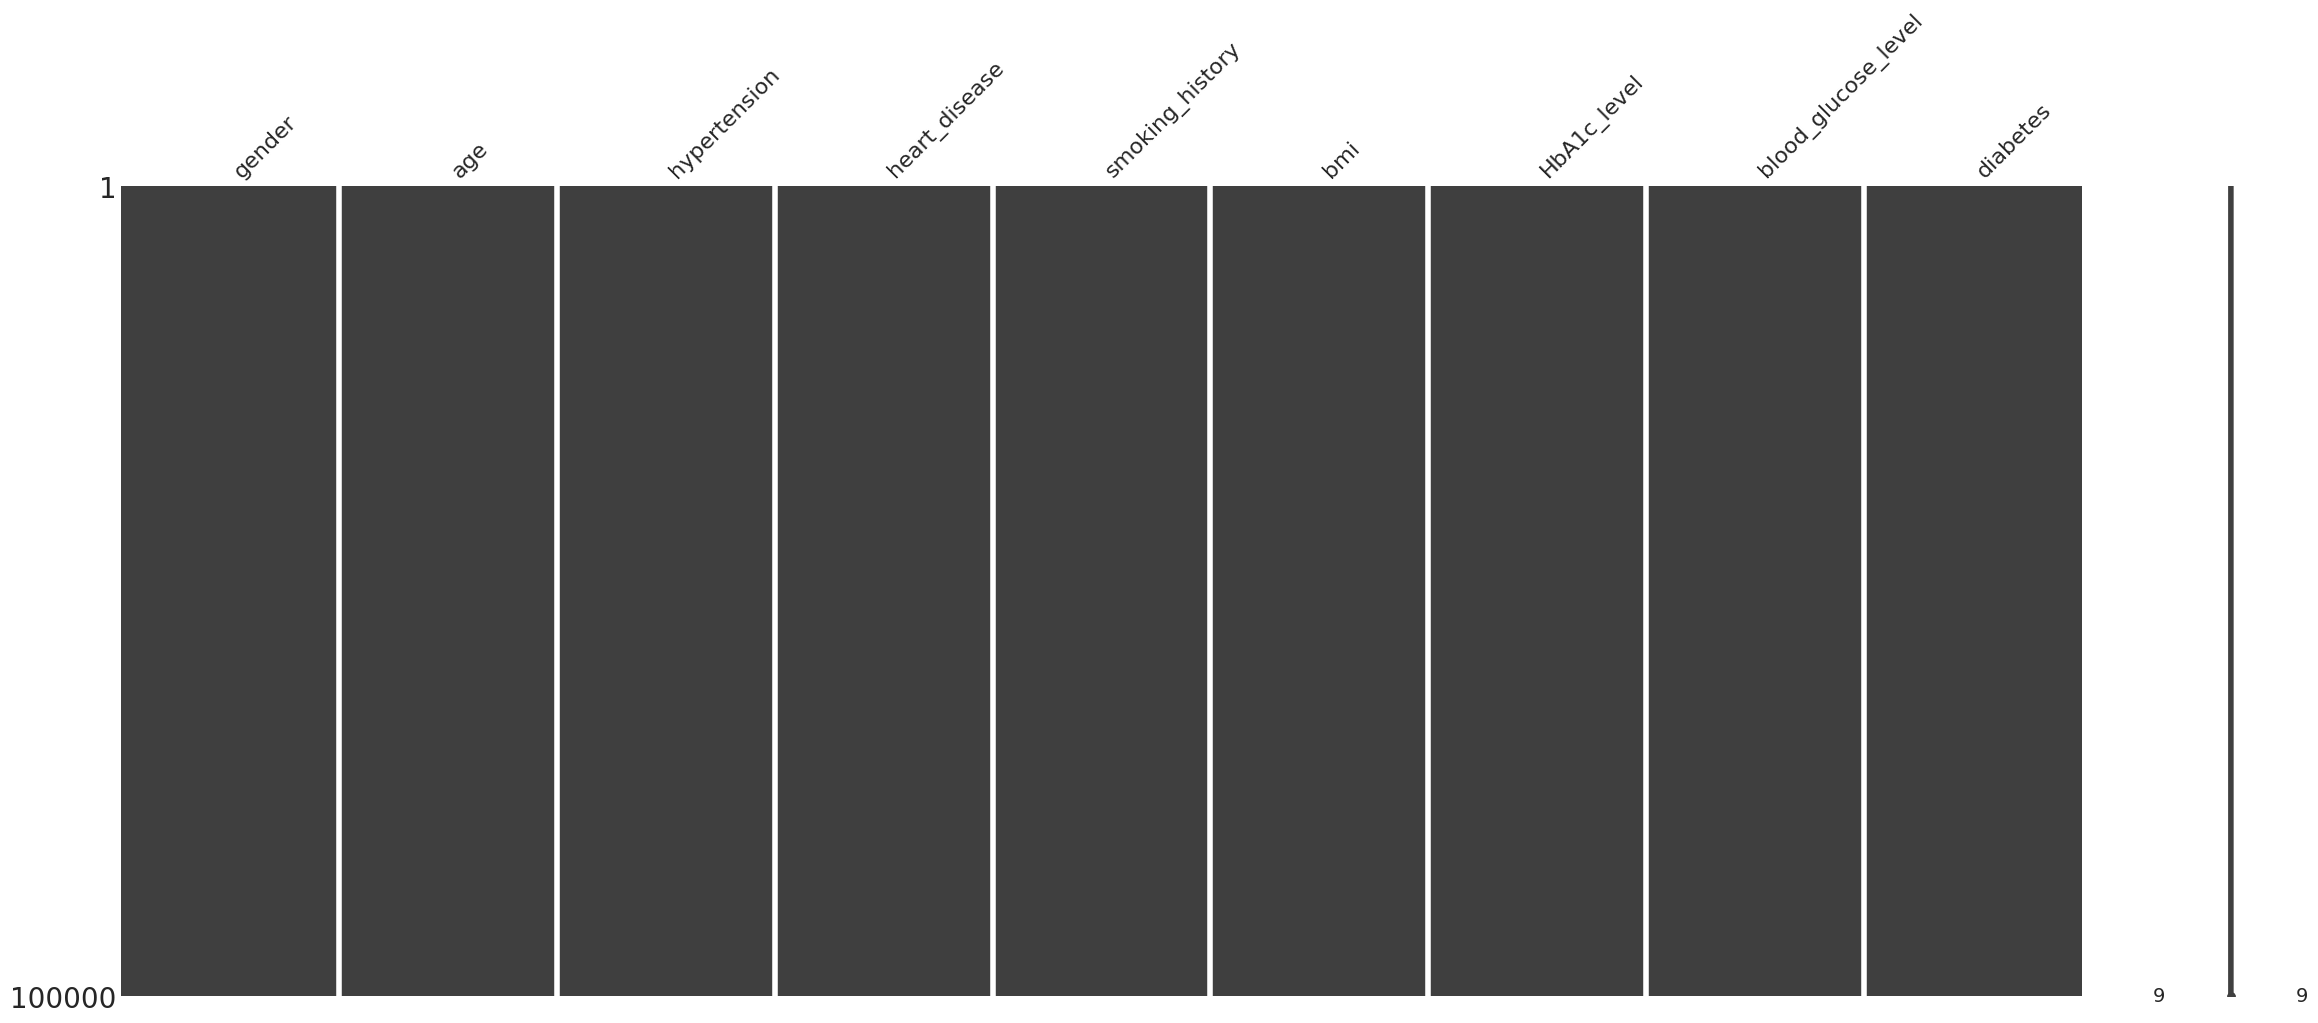

In [ ]:
# Checking for missing values
print(diabetes_df.isnull().sum())

# Visualizing missing values
import missingno as msno

msno.matrix(diabetes_df)
plt.show()

#### EDA:

Summarizing the main characteristics of the dataset, often through visualizations and statistics.

- Data Profiling: Assessing the data's quality, such as checking for missing values, outliers, and anomalies.
- Contextual Understanding: Understanding the context in which the data was collected and what it represents.


**Visualize Data Distribution**


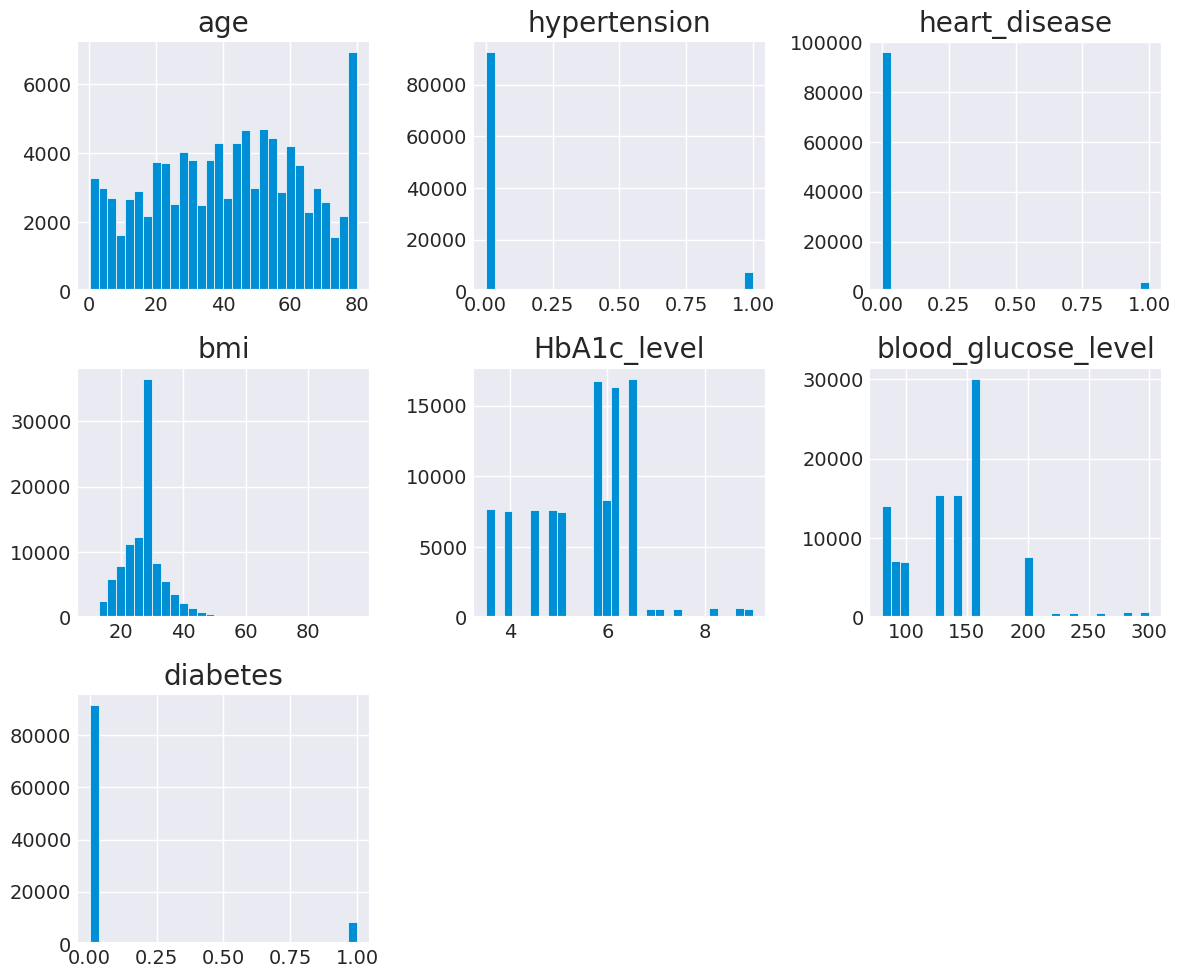

In [ ]:
# Histograms for each feature
diabetes_df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()

**Descriptive Statistics**

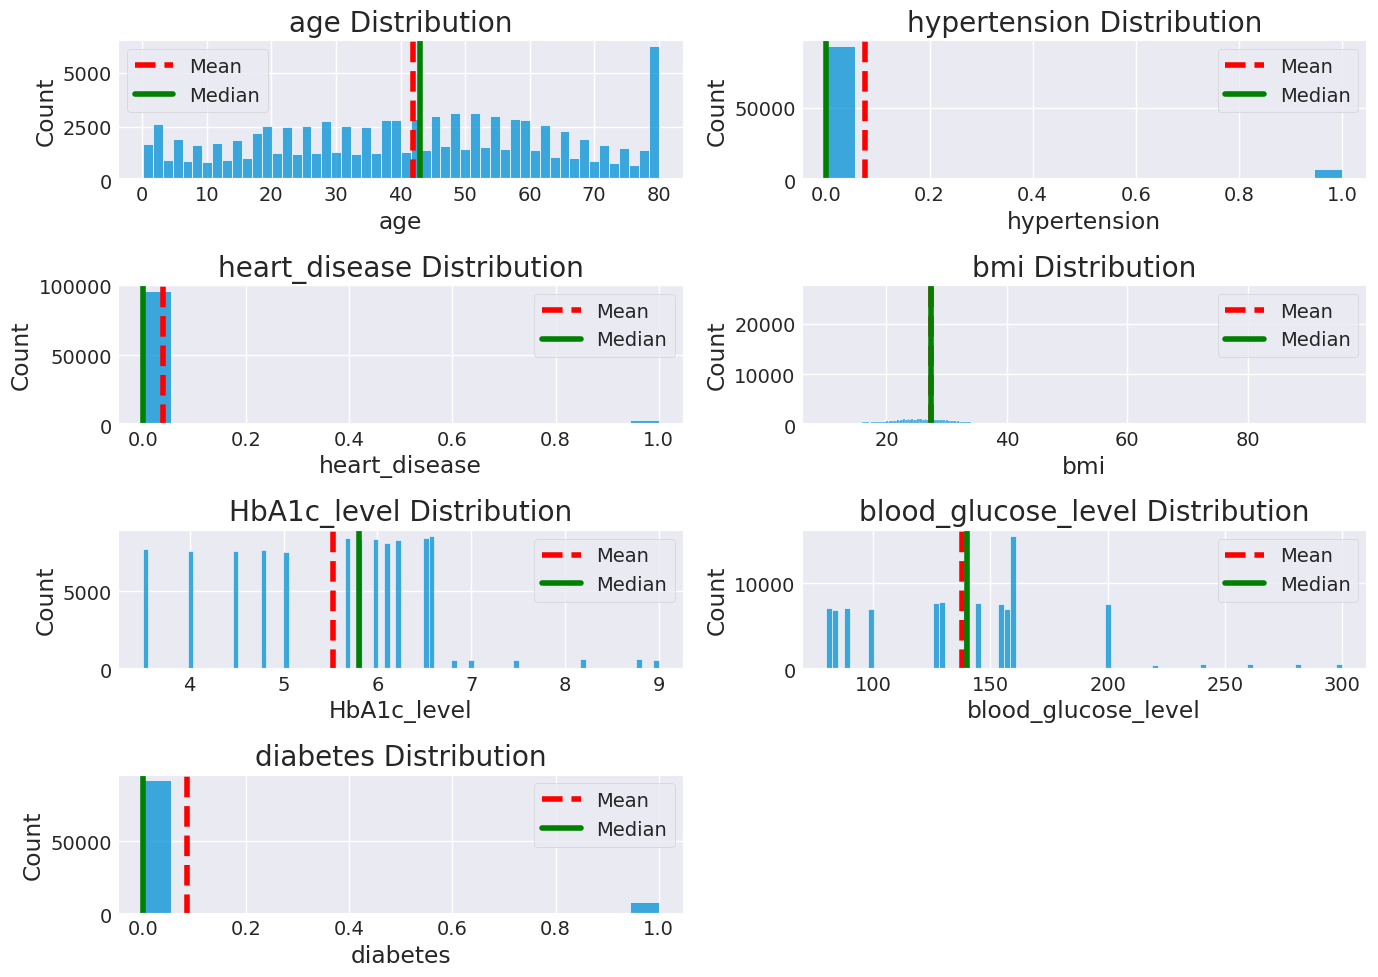

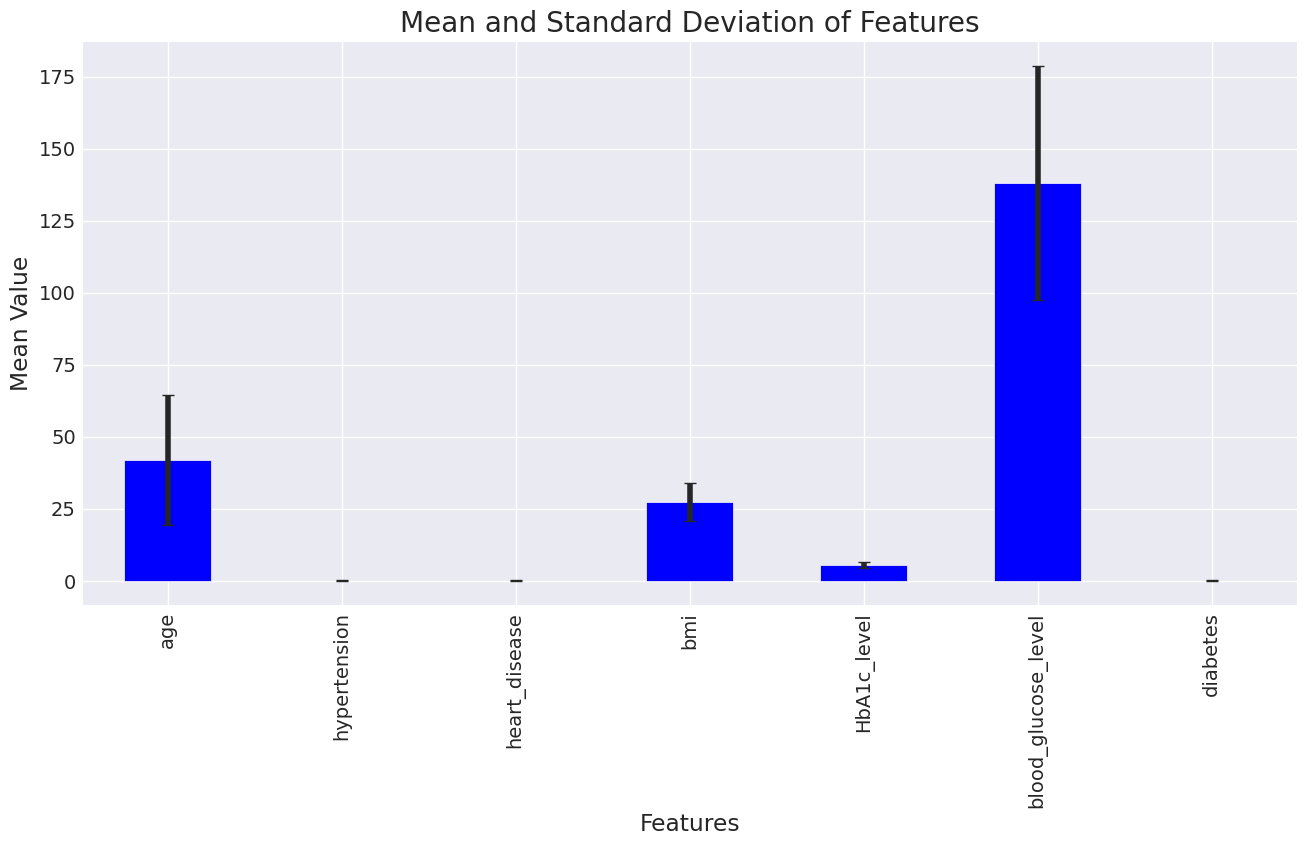

In [ ]:
# Computing Summary Statistics & Creating Visualizations

# Computing basic summary statistics
mean_values = diabetes_df.select_dtypes(include=[np.number]).mean()
median_values = diabetes_df.select_dtypes(include=[np.number]).median()
mode_values = diabetes_df.select_dtypes(include=[np.number]).mode().iloc[0]  # mode() returns a DataFrame, take the first row
std_dev_values = diabetes_df.select_dtypes(include=[np.number]).std()

# Histograms with Mean and Median Lines
def plot_histograms_with_stats(df):
    num_features = diabetes_df.select_dtypes(include=[np.number]).columns
    num_plots = len(num_features)

    plt.figure(figsize=(14, 10))
    for i, feature in enumerate(num_features, 1):
        plt.subplot((num_plots + 1) // 2, 2, i)
        sns.histplot(diabetes_df[feature], kde=False)
        plt.axvline(mean_values[feature], color='r', linestyle='--', label='Mean')
        plt.axvline(median_values[feature], color='g', linestyle='-', label='Median')
        plt.title(f'{feature} Distribution')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_histograms_with_stats(duplicated_val)

# Bar Plots for Mean and Standard Deviation
plt.figure(figsize=(14, 7))
mean_values.plot(kind='bar', color='b', yerr=std_dev_values, capsize=4)
plt.title('Mean and Standard Deviation of Features')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

**Explore Relationships Between Features**


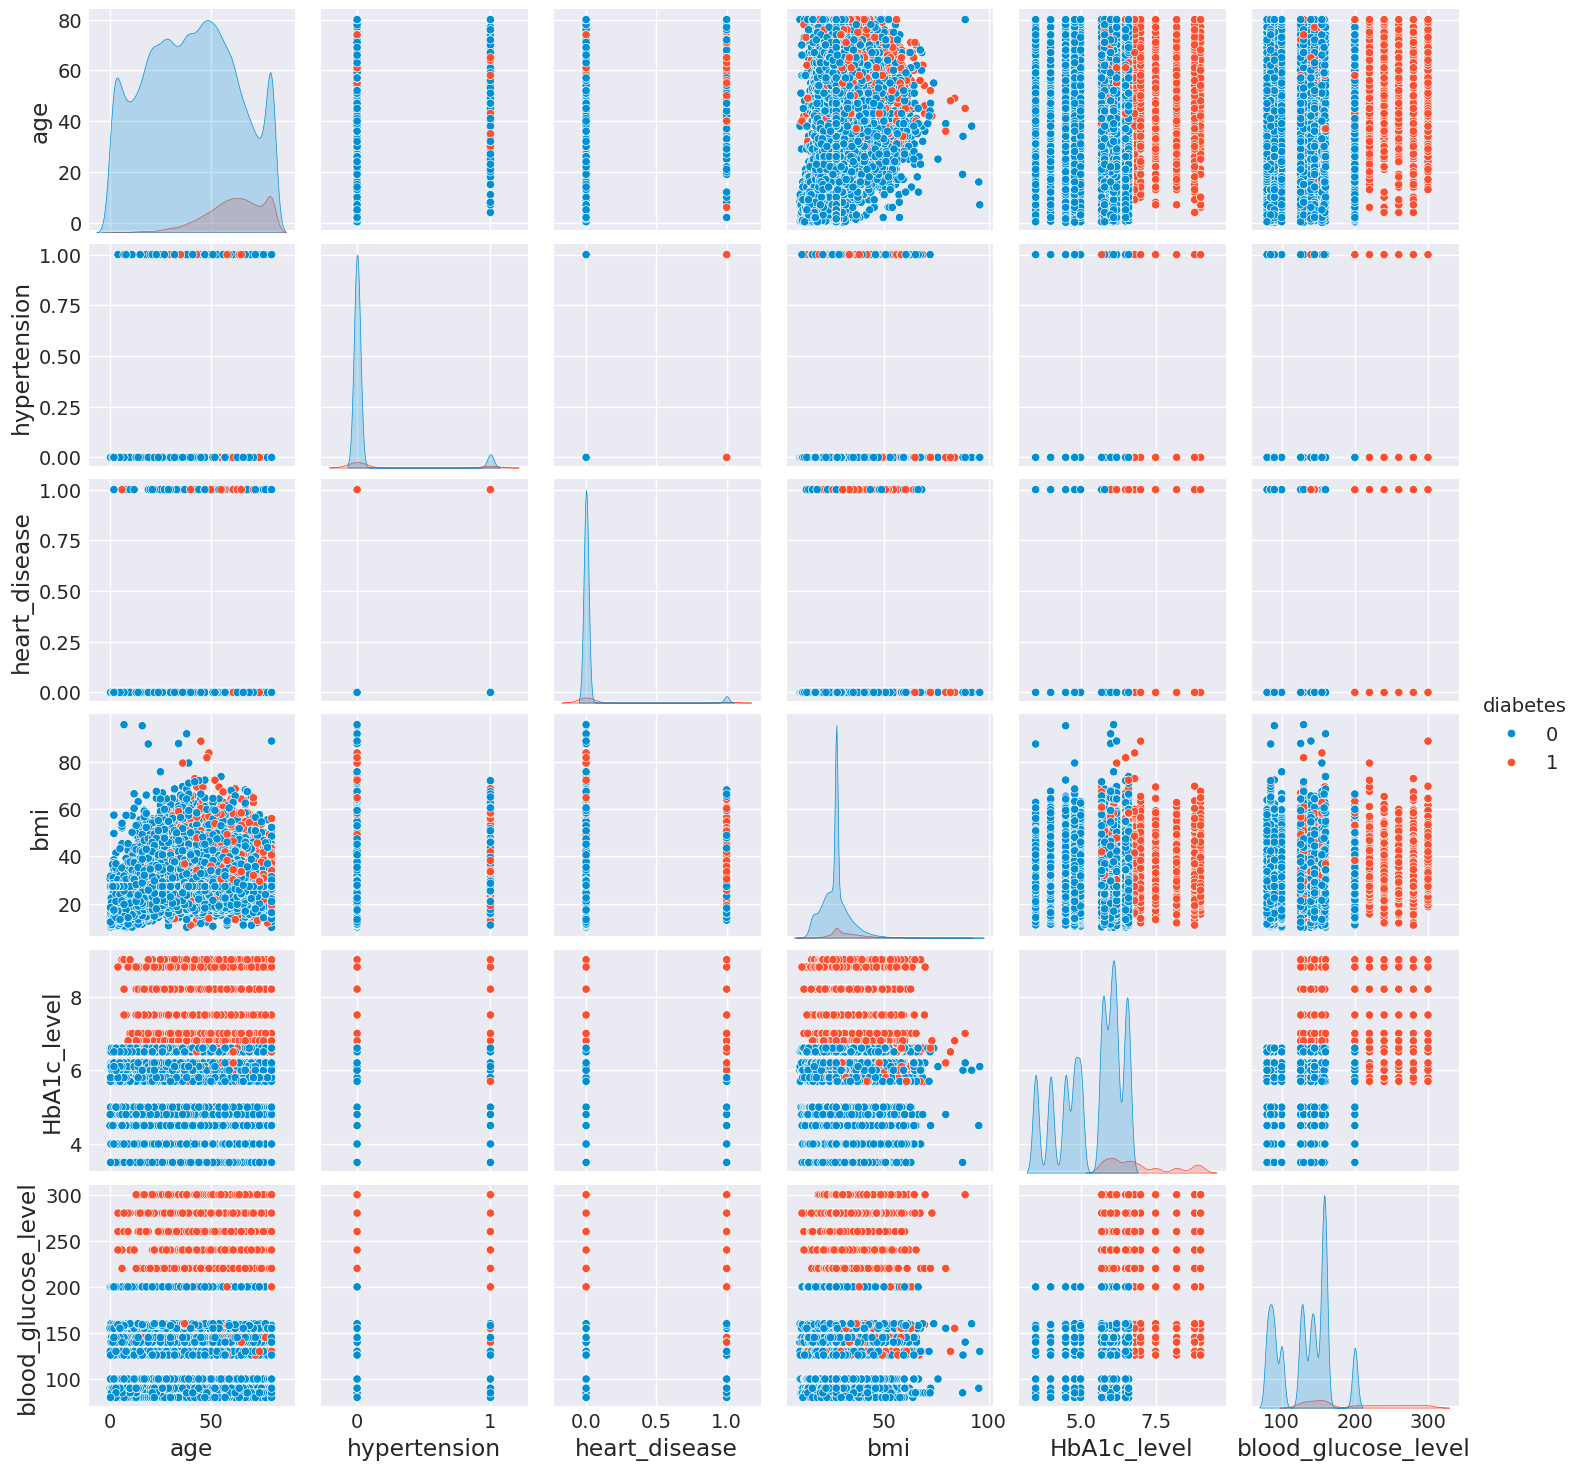

In [ ]:
# Scatter plot matrix
sns.pairplot(diabetes_df, hue='diabetes')
plt.show()

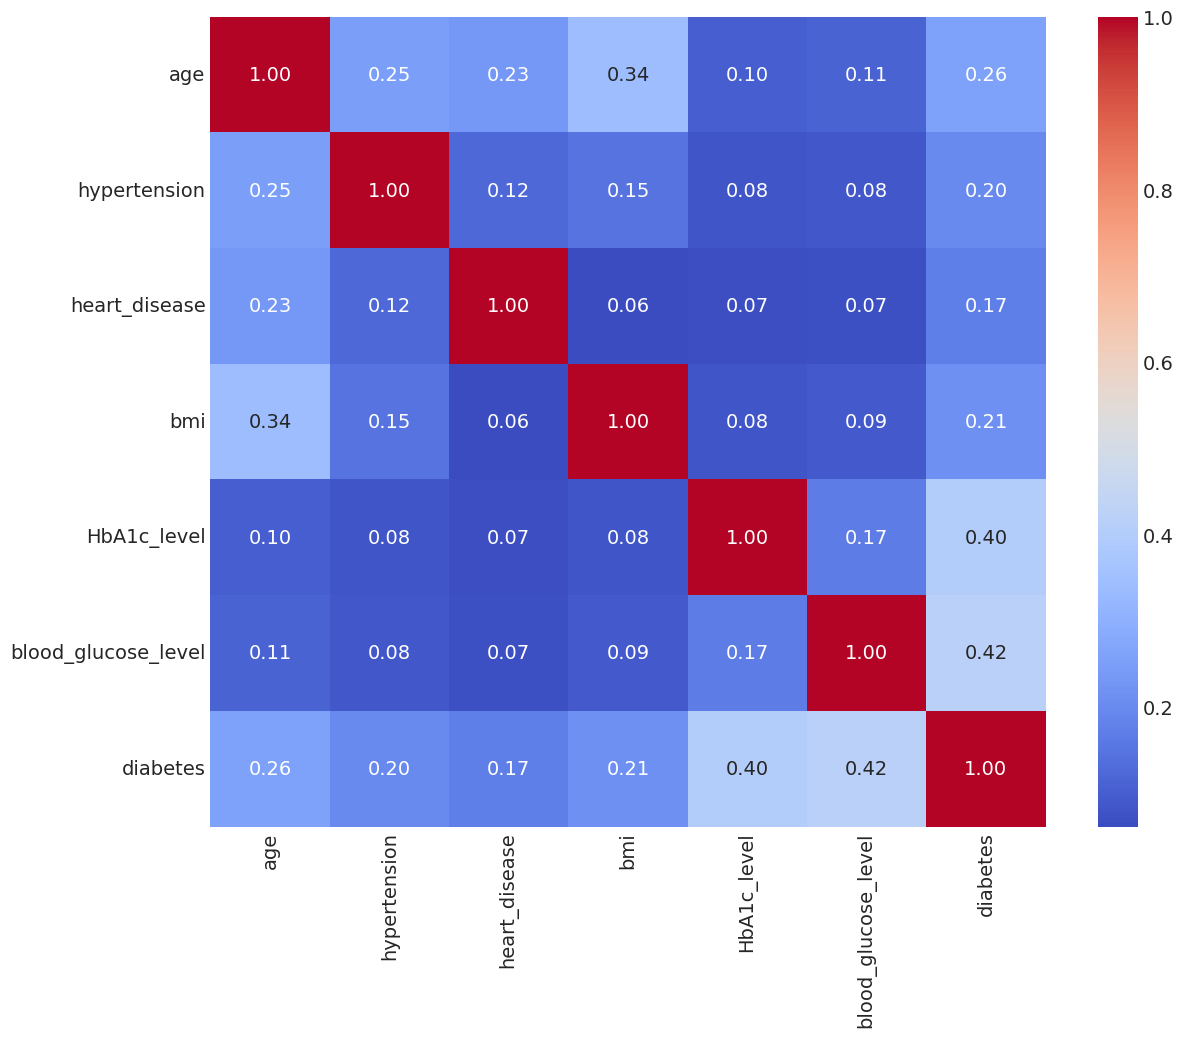

In [ ]:
# Computing and visualizing the correlation matrix
correlation_matrix = diabetes_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**Analyze Outliers**


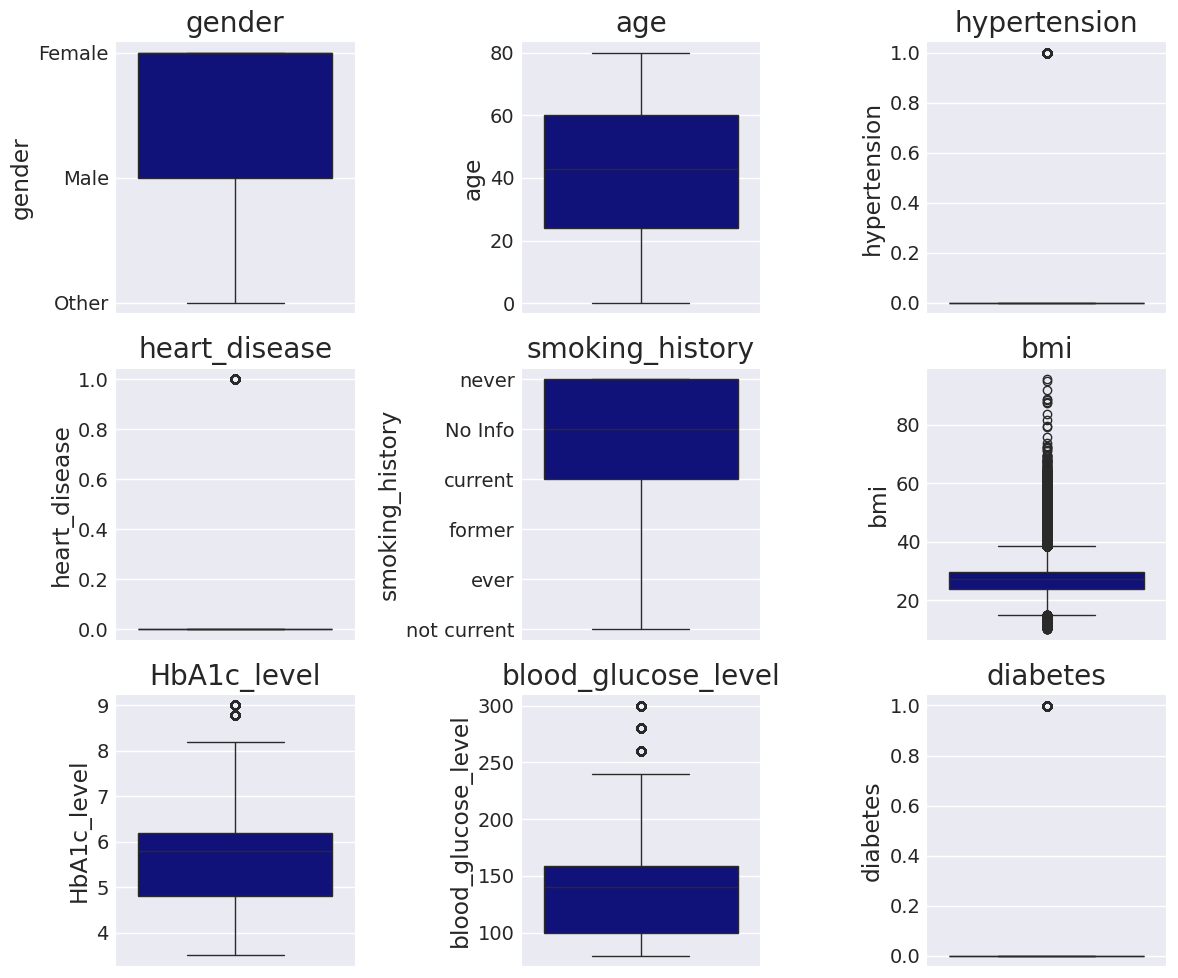

In [ ]:
# Outlier detection using box plots

plt.figure(figsize=(12, 10))
for i, column in enumerate(diabetes_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_df[column],color='darkblue')
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# Outlier detection using IQR
for feature in diabetes_df.select_dtypes(include='number'): # Select only numeric columns
    Q1 = diabetes_df[feature].quantile(0.25)
    Q3 = diabetes_df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outliers = diabetes_df[(diabetes_df[feature]>upper)|(diabetes_df[feature]<lower)]
    if outliers.any(axis=None):
        print(f"There are {len(outliers)} outliers in {feature}")
    else:
        print(f"There are no outlier in {feature} ")

There are no outlier in age 
There are 7485 outliers in hypertension
There are 3942 outliers in heart_disease
There are 7086 outliers in bmi
There are 1315 outliers in HbA1c_level
There are 2038 outliers in blood_glucose_level
There are 8500 outliers in diabetes


We have a significant number of outliers in the d/f columns, particularly in BMI.

Given our large dataset of around 10 million samples, I recommend removing all outliers.

In [ ]:
# Removing outliers using IQR
def filter_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# List of columns to check for outliers
columns = [
    'hypertension',           # 7485 outliers
    'heart_disease',           # 3942 outliers
    'bmi',                    # 7086 outliers
    'HbA1c_level',             # 1315 outliers
    'blood_glucose_level',      # 2038 outliers
    # 'diabetes'                # 8500 outliers  # for target col not removing
]

# Removing outliers from the specified columns
diabetes_df = filter_outliers(diabetes_df, columns)

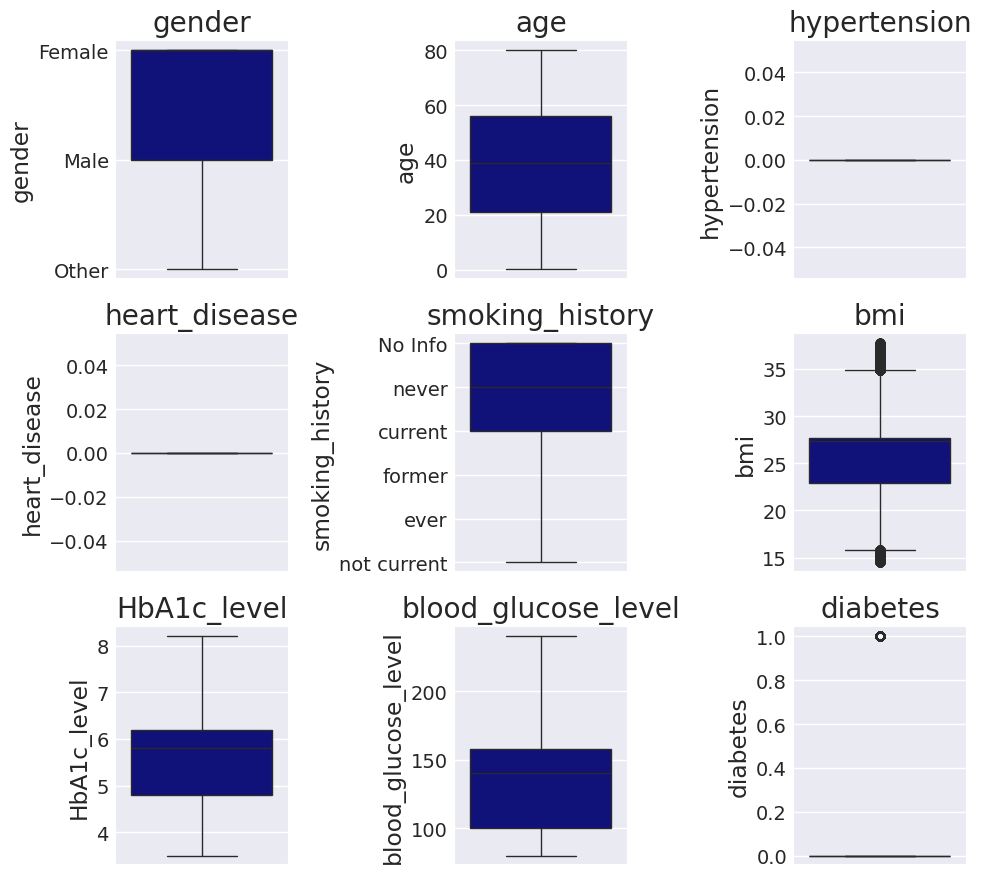

In [ ]:
# After removing outlier the box plot:

plt.figure(figsize=(10, 9))
for i, column in enumerate(diabetes_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_df[column],color='darkblue')
    plt.title(column)
plt.tight_layout()


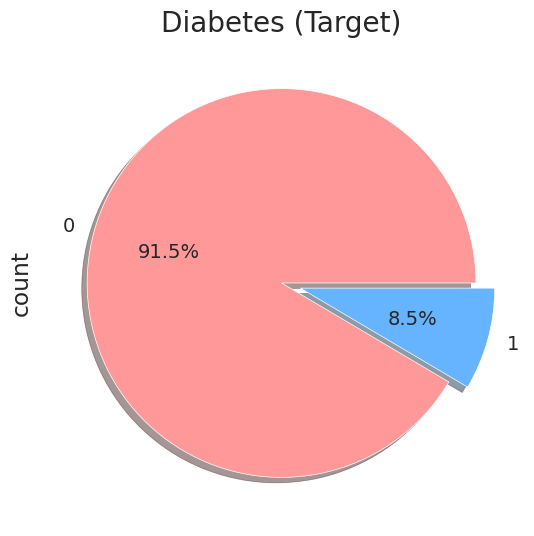

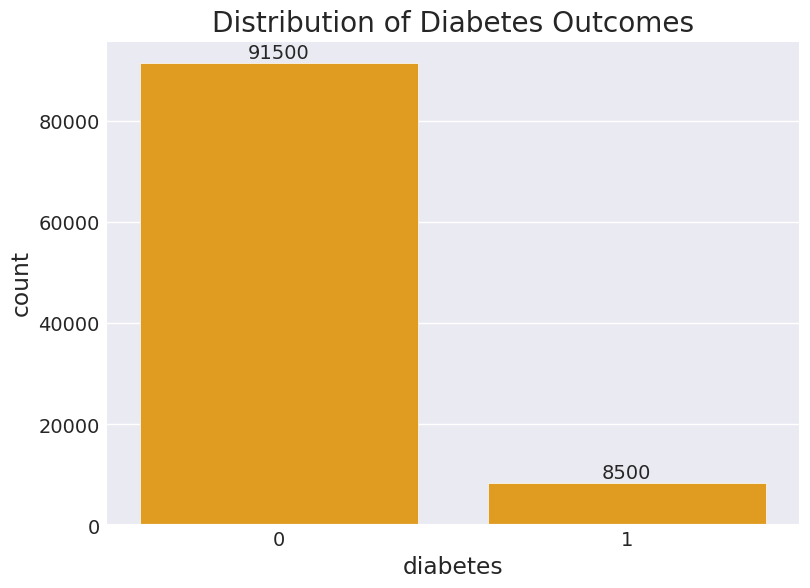

In [ ]:
# Visualization for target column
plt.figure(figsize=(8, 6))
# Defining colors for the pie chart
colors_pie = ['#ff9999','#66b3ff']  # Customize colors
ax1 = diabetes_df['diabetes'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=colors_pie
)
plt.title('Diabetes (Target)')

# Visualization for target column
plt.figure(figsize=(8, 6))
ax2=sns.countplot(x='diabetes', data=diabetes_df, color ='orange')
ax2.bar_label(ax2.containers[0])
plt.title('Distribution of Diabetes Outcomes')
plt.show()

Although class imbalance is evident in this dataset, it is not being addressed for this particular task.



#### Preprocessing:

Process of cleaning and transforming data to prepare it for analysis or modeling. It election to improve the efficiency of the analysis or model.

Typically including:

- Data Cleaning: Handling missing values, correcting errors, and removing duplicates.
- Data Transformation: Normalizing or scaling data, encoding categorical variables, and aggregating data.
- Data Reduction: Reducing dimensionality or feature s


In [ ]:
# Handle missing values if any.
# Standardize features.
# Encode categorical variables if any.

**Handling missing values**

In [ ]:
print(diabetes_df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


**Encoding**

In [ ]:
diabetes_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to each categorical feature
diabetes_df['gender_encoded'] = label_encoder.fit_transform(diabetes_df['gender'])
diabetes_df['smoking_history_encoded'] = label_encoder.fit_transform(diabetes_df['smoking_history'])

# Droping the original categorical columns b/c no longer needed
diabetes_df_encoded = diabetes_df.drop(['gender', 'smoking_history'], axis=1)
display(diabetes_df_encoded.head())

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
5  20.0             0              0  27.32          6.6                   85   
6  44.0             0              0  19.31          6.5                  200   

   diabetes  gender_encoded  smoking_history_encoded  
1         0               0                        0  
2         0               1                        4  
3         0               0                        1  
5         0               0                        4  
6         1               0                        4

**Standarization**

Standardizing numerical features.

In [ ]:
# Splitting the data in X, y
X = diabetes_df_encoded.drop('diabetes', axis=1)
y = diabetes_df_encoded['diabetes']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:6]

array([[ 0.68283284,  0.        ,  0.        ,  0.28132991,  1.17442033,
        -1.54812686, -0.83494762, -1.09290052],
       [-0.49474981,  0.        ,  0.        ,  0.28132991,  0.26352528,
         0.68537335,  1.19561948,  0.99845487],
       [-0.13241669,  0.        ,  0.        , -0.52274904, -0.44494864,
         0.5994695 , -0.83494762, -0.57006168],
       [-0.85708294,  0.        ,  0.        ,  0.28132991,  1.17442033,
        -1.40495377, -0.83494762,  0.99845487],
       [ 0.22991644,  0.        ,  0.        , -1.38292653,  1.07320977,
         1.88802732, -0.83494762,  0.99845487],
       [ 1.81512385,  0.        ,  0.        , -0.43756238,  0.26352528,
        -1.40495377, -0.83494762, -1.09290052]])

#### Model Development & Evaluation:

In [ ]:
# Splitting data in features & target (is already done above)

In [ ]:
# Applying train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implementing Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Making predictions on both sets
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

# Transform predictions back to original labels
# y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)
# y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

In [38]:
# Evaluating the model using accuracy, precision, and recall

def evaluate_model_performance(y_true, y_pred, dataset_name='Dataset', labels=None):
    """
    Evaluate and print the performance metrics for a given set of true and predicted labels.
    """

    # Calculating metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Using 'weighted' for multi-class
    recall = recall_score(y_true, y_pred, average='weighted')  # Using 'weighted' for multi-class
    f1 = f1_score(y_true, y_pred, average='weighted')  # Using 'weighted' for multi-class
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Printing metrics
    print(f'{dataset_name} Accuracy: {accuracy * 100:.2f}%')
    print(f'{dataset_name} Precision: {precision * 100:.2f}%')
    print(f'{dataset_name} Recall: {recall * 100:.2f}%')

    # Printing confusion matrix
    print(f'\n{dataset_name} Confusion Matrix:\n')
    print(conf_matrix)

    # Printing classification report
    print(f'\n{dataset_name} Classification Report:\n')
    class_report = classification_report(y_true, y_pred, target_names=labels) if labels else classification_report(y_true, y_pred)
    print(class_report)

    # return accuracy, precision, recall, conf_matrix, class_report

In [39]:
# Defining labels for your classes
classes = ['No', 'Yes']

# Evaluating training set performance
evaluate_model_performance(y_train, y_train_pred, dataset_name='Training Set', labels=classes)

# Evaluating test set performance
evaluate_model_performance(y_test, y_test_pred, dataset_name='Test Set', labels=classes)

Training Set Accuracy: 74.11%
Training Set Precision: 74.21%
Training Set Recall: 74.11%

Training Set Confusion Matrix:

[[730 304]
 [234 810]]

Training Set Classification Report:

              precision    recall  f1-score   support

          No       0.76      0.71      0.73      1034
         Yes       0.73      0.78      0.75      1044

    accuracy                           0.74      2078
   macro avg       0.74      0.74      0.74      2078
weighted avg       0.74      0.74      0.74      2078

Test Set Accuracy: 71.54%
Test Set Precision: 71.61%
Test Set Recall: 71.54%

Test Set Confusion Matrix:

[[185  80]
 [ 68 187]]

Test Set Classification Report:

              precision    recall  f1-score   support

          No       0.73      0.70      0.71       265
         Yes       0.70      0.73      0.72       255

    accuracy                           0.72       520
   macro avg       0.72      0.72      0.72       520
weighted avg       0.72      0.72      0.72       520



In [ ]:
 # Function for plotting confusion matrix

def plot_confusion_matrix(conf_matrix, labels):
    """
    Plot the confusion matrix with a heatmap.
    """
    plt.figure(figsize=(10, 8))

    # Creating the heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                cbar_kws={'shrink': .8}, annot_kws={"size": 12})

    # Labeling the axes and the plot
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)

    # Adjusting the tick parameters for better readability
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Showing the plot
    plt.show()


In [ ]:
 # Function for plotting confusion matrix

def plot_confusion_matrix(conf_matrix, labels):
    """
    Plot the confusion matrix with a heatmap.
    """
    num_classes = len(labels)

    # Checking if conf_matrix is square and has the same number of classes
    if conf_matrix.shape != (num_classes, num_classes):
        raise ValueError(f"Confusion matrix must be {num_classes}x{num_classes} and labels list must have {num_classes} entries.")

    plt.figure(figsize=(10, 8))

    # Creating the heatmap with the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels,
                cbar_kws={'shrink': .8}, annot_kws={"size": 12})

    # Labeling the axes and the plot
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)

    # Adjusting the tick parameters for better readability
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Showing the plot
    plt.show()

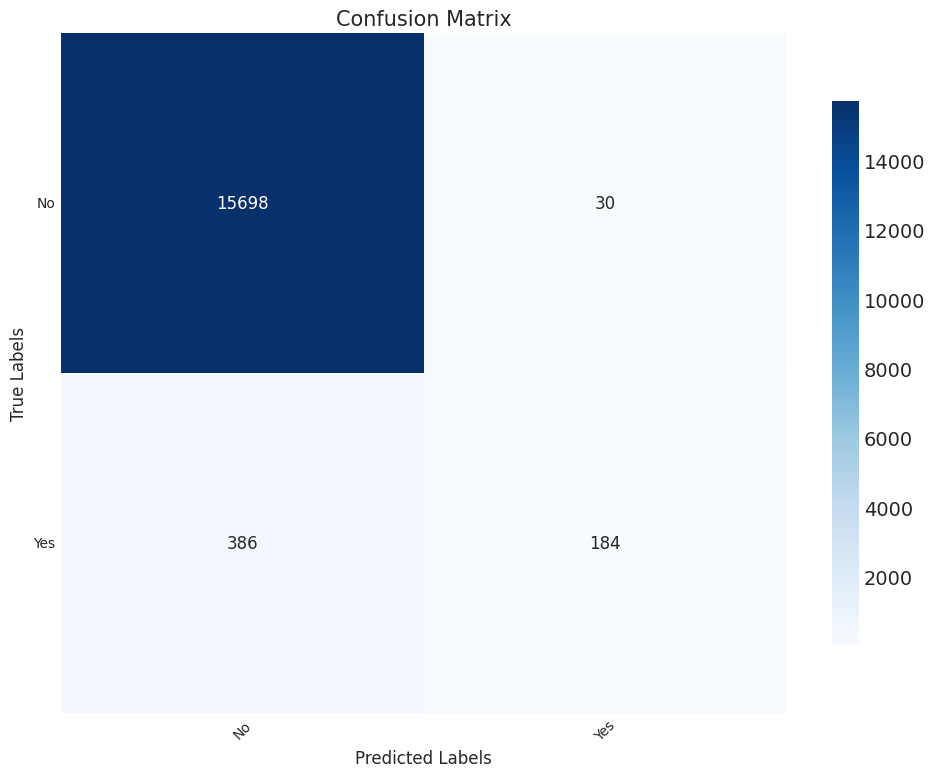

In [ ]:
# Taking`conf_matrix` is diabetes confusion matrix and in col `diabeties` are our class labels
conf_matrix = confusion_matrix(y_test, logistic_reg.predict(X_test))
#e.g conf_matrix = np.array([[50, 2, 1],  # True class 0
                        # [5, 45, 3],  # True class 1
                        # [2, 7, 40]]) # True class 2

# Corresponding labels (assuming you know these labels for your classes)
classes = ['No', 'Yes']

# Plotting the confusion matrix
plot_confusion_matrix(conf_matrix, labels=classes)

## **2. Classifying Iris Species Using Decision Trees 🌿**

This is multi-class classification problem.




#### Data Understanding:


In [ ]:
display('Shape of Data:',iris_df.shape)
display('Columns:', iris_df.columns)
display('Data types:',iris_df.dtypes)
display('Preview of data -Head:',iris_df.head())
display('Preview of data -Tail:',iris_df.tail())
display('Info:',iris_df.info())
display('Summary Stats:',iris_df.describe())
display('Missing Values:',iris_df.isnull().sum())
display('Duplicate Values:',iris_df.duplicated().sum())

'Shape of Data:'

(150, 5)

'Columns:'

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

'Data types:'

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

'Preview of data -Head:'

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

'Preview of data -Tail:'

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
145        2  
146        2  
147        2  
148        2  
149        2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


'Info:'

None

'Summary Stats:'

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

'Missing Values:'

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

'Duplicate Values:'

1

#### Preprocessing:


In [ ]:
# Handle missing values if any.
# Standardize features.
# Encode categorical variables if any.

- In summary, the Iris dataset is straightforward and clean, making advanced preprocessing steps like handling missing values, standardizing features, and encoding categorical variables unnecessary for typical usage.


- Plus, in the Iris dataset, encoding categorical variables is not required because the target variable, species, is categorical and can be directly used by most machine learning algorithms that support categorical data natively. For algorithms that require numerical input, the Iris dataset is often used in its original form with the categorical labels directly converted to numerical labels as part of the model training proces

#### Model Development & Evaluation:

In [ ]:
# Implementing a decision tree classifier

# Seperating X, y
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)


Test Set Accuracy: 100.00%
Test Set Precision: 100.00%
Test Set Recall: 100.00%

Test Set Confusion Matrix:

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Test Set Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



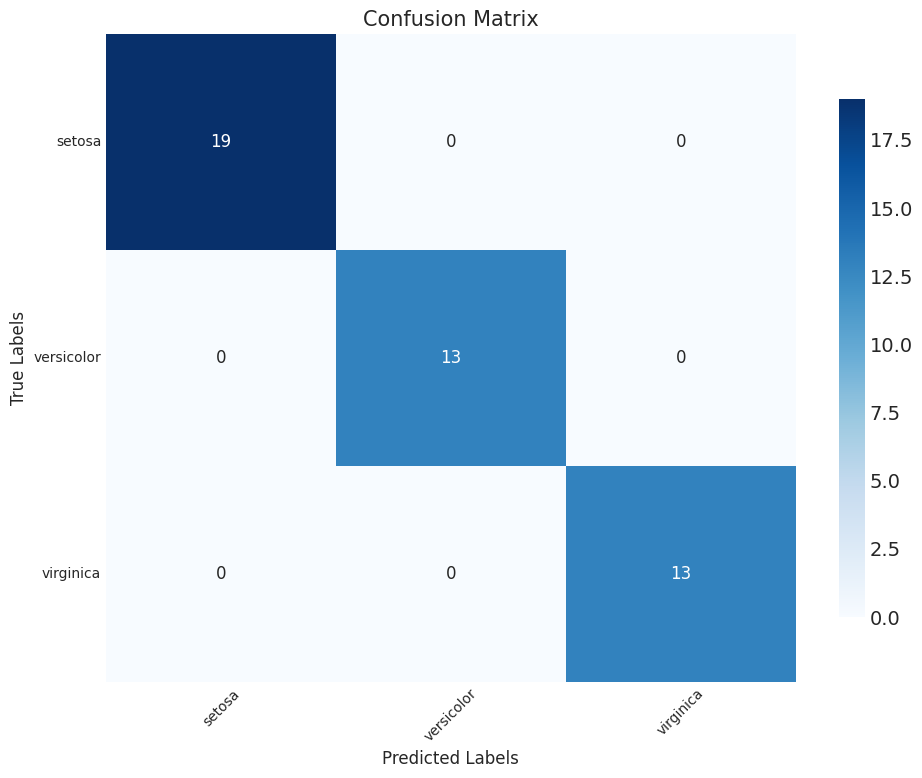

In [ ]:
# Evaluating the model using confusion matrix and accuracy

conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['setosa', 'versicolor', 'virginica']
evaluate_model_performance(y_test, y_pred, dataset_name='Test Set', labels=labels)
plot_confusion_matrix(conf_matrix, labels )  #labels=iris_df['species'].unique()

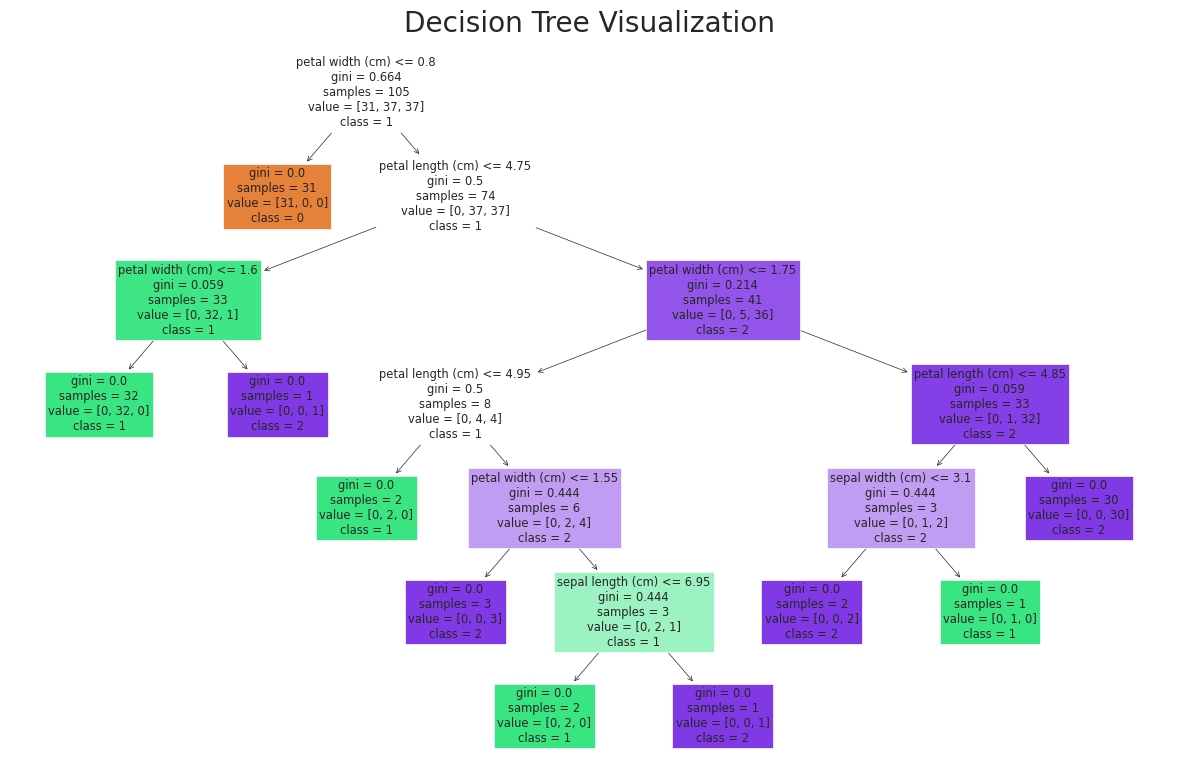

In [ ]:
# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
class_names = [str(name) for name in iris_df['species'].unique()]  # Convert class names to strings
plot_tree(clf, feature_names=iris_df.columns[:-1], class_names=class_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()


## **3. Predicting Titanic Survival Using Logistic Regression 🚢**

This is binary classification problem.



#### Data Understanding:


In [ ]:
display('Shape of Data:',titanic_df.shape)
display('Columns:', titanic_df.columns)
display('Data types:',titanic_df.dtypes)
display('Preview of data -Head:',titanic_df.head())
display('Preview of data -Tail:',titanic_df.tail())
display('Info:',titanic_df.info())
display('Summary Stats:',titanic_df.describe())
display('Missing Values:',titanic_df.isnull().sum())
display('Duplicate Values:',titanic_df.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(891, 15)

'Columns:'

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

'Data types:'

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

'Preview of data -Head:'

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

'Preview of data -Tail:'

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


'Info:'

None

'Summary Stats:'

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

'Missing Values:'

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

'Duplicate Values:'

107

**1. Data Overview**
- **Shape of Data:** (891, 15)
- **Columns:** 15, including both categorical and numerical features.
- **Data Types:**
  - Numerical: int64, float64
  - Categorical: object, category
  - Boolean: bool
2. **Initial Insights**
  - **Columns and Their Types:**
    - Numerical Features: pclass, age, sibsp, parch, fare
    - Categorical Features: sex, embarked, class, who, deck, embark_town, alive
    - Boolean Features: adult_male, alone
  - **Summary Statistics:**
    - Survival Rate: Approximately 38% (mean of survived column)
    - Age: Mean age is about 29.7 years with a wide range (0.42 to 80 years)
    - Fare: Mean fare is approximately $32.20 with some outliers (up to $512.33)
    - Pclass: Most passengers are in 2nd or 3rd class, with the majority in 3rd class
3. **Missing Values**
- Age: 177 missing values
- Embarked: 2 missing values
- Deck: 688 missing values (a significant amount)
- Embark_town: 2 missing values
4. **Duplicate Values**
- 107 duplicate rows: These need to be removed as they may skew the analysis and model performance.

In [ ]:
# Checking for duplicate values in each column
duplicate_values_summary = {}
for column in titanic_df.columns:
    duplicates = titanic_df[column].duplicated().sum()
    if duplicates > 0:
        duplicate_values_summary[column] = duplicates

# Printing out the summary of duplicates in columns
for column, count in duplicate_values_summary.items():
    print(f"Column '{column}' has {count} duplicate values.")

Column 'survived' has 889 duplicate values.
Column 'pclass' has 888 duplicate values.
Column 'sex' has 889 duplicate values.
Column 'age' has 802 duplicate values.
Column 'sibsp' has 884 duplicate values.
Column 'parch' has 884 duplicate values.
Column 'fare' has 643 duplicate values.
Column 'embarked' has 887 duplicate values.
Column 'class' has 888 duplicate values.
Column 'who' has 888 duplicate values.
Column 'adult_male' has 889 duplicate values.
Column 'deck' has 883 duplicate values.
Column 'embark_town' has 887 duplicate values.
Column 'alive' has 889 duplicate values.
Column 'alone' has 889 duplicate values.


#### Preprocessing Steps:

In [ ]:
# Handle missing values (e.g., fill missing ages with median).
# Encode categorical variables (e.g., one-hot encoding for embarked and gender).
# Standardize numerical features.

##### Handling Data Integrity
*Redundancy & Consistency*

- The embarked and embark_town columns contain overlapping information about the embarkation points.

- The information in who can be derived from sex and age. If who is derived from these features, it might be redundant.

- The sex and age are present, adult_male can be inferred and is therefore redundant.

- The alive column is redundant if you already have survived, as both columns represent the same information about survival.

In [ ]:
# Dropping the 'embark_town' column in place
titanic_df.drop('embark_town', axis=1, inplace=True)

# Displaying the updated DataFrame
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck alive  alone  
0    man        True  NaN    no  False  
1  woman       False    C   yes  False  
2  woman       False  NaN   yes   True  
3  woman       False    C   yes  False  
4    man        True  NaN    no   True

In [ ]:
# Dropping redundant or less useful columns
columns_to_remove = ['class', 'who', 'adult_male', 'alive']
titanic_df = titanic_df.drop(columns=columns_to_remove)
titanic_df.head(2)
# Optionally evaluate 'alone' based on their relevance

survived  pclass     sex   age  sibsp  parch     fare embarked deck  alone
0         0       3    male  22.0      1      0   7.2500        S  NaN  False
1         1       1  female  38.0      1      0  71.2833        C    C  False

##### Handling missing values

- Age: Imputing missing values. Options include using the median age or more sophisticated methods like predictive imputation.

In [ ]:
median_age = titanic_df['age'].median()
titanic_df['age'].fillna(median_age, inplace=True)

- Embarked: Imputing with the most frequent value (mode), since it’s a small number of missing values.


In [ ]:
mode_embarked = titanic_df['embarked'].mode()[0]
titanic_df['embarked'].fillna(mode_embarked, inplace=True)

- Deck: A large proportion of missing values (almost 77%). You might choose to impute with a placeholder value. But I drop this feature as it has too little information and containing large ratio of missing values.


In [ ]:
titanic_df.drop(columns=['deck'], inplace=True)

##### Handling Duplicates:
Remove duplicates: Droping the duplicate rows to ensure the data's integrity.

In [ ]:
# Again checking duplicates as we've manipulated the dataframe
# Checking for duplicated rows
# titanic_df[titanic_df.duplicated()]
# titanic_df.duplicated()
titanic_df.duplicated().sum()

116

In [ ]:
titanic_df.drop_duplicates(inplace=True)
titanic_df.shape

(775, 9)

In [ ]:
# Verifying processed data
display(titanic_df.info())
display(titanic_df.sample())

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  775 non-null    int64  
 1   pclass    775 non-null    int64  
 2   sex       775 non-null    object 
 3   age       775 non-null    float64
 4   sibsp     775 non-null    int64  
 5   parch     775 non-null    int64  
 6   fare      775 non-null    float64
 7   embarked  775 non-null    object 
 8   alone     775 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 55.2+ KB


None

survived  pclass     sex   age  sibsp  parch  fare embarked  alone
576         1       2  female  34.0      0      0  13.0        S   True

##### Exploratory Data Analysis (EDA):

**Analyzing Numerical Features**

1. **Summary Statistics**

Calculating basic statistics to get an overview of the numeric features.

In [ ]:
# List of numeric features
numeric_features = titanic_df.select_dtypes(include=['int64', 'float64']).columns

# Summary statistics
print(titanic_df[numeric_features].describe())

         survived      pclass         age       sibsp       parch        fare
count  775.000000  775.000000  775.000000  775.000000  775.000000  775.000000
mean     0.412903    2.246452   29.581187    0.529032    0.420645   34.878403
std      0.492674    0.853574   13.766359    0.990326    0.840565   52.408474
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   21.000000    0.000000    0.000000    8.050000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   15.900000
75%      1.000000    3.000000   36.000000    1.000000    1.000000   34.197900
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


2. **Distribution Analysis**

Visualizing the distribution of numeric features to understand their spread and detect any skewness or outliers.

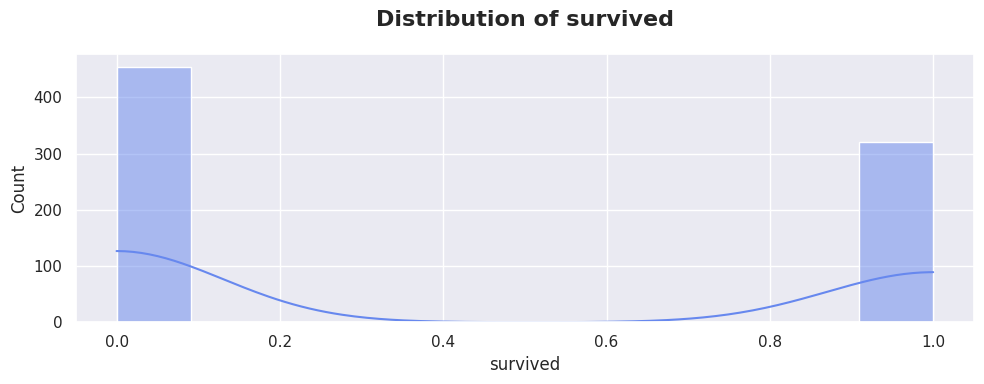

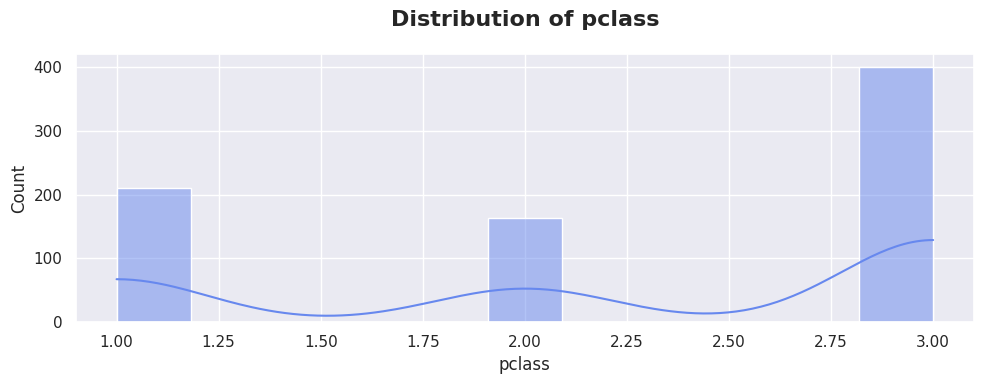

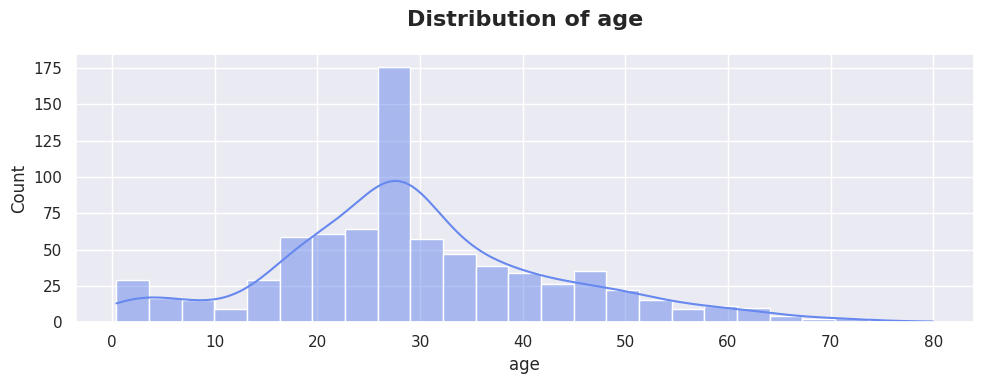

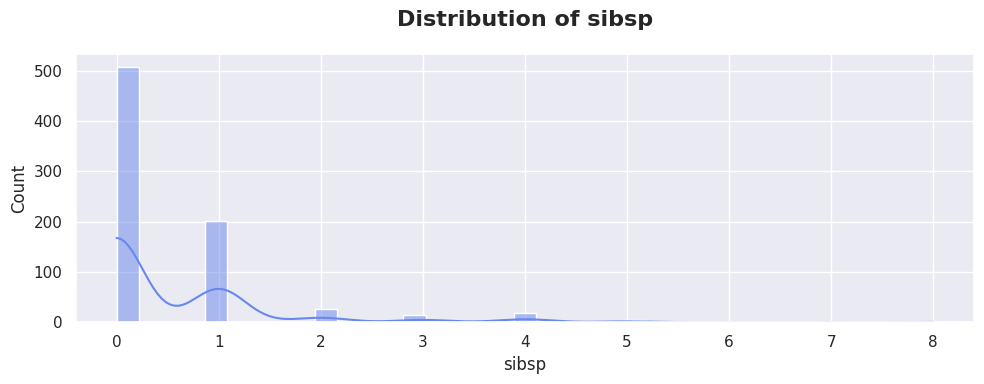

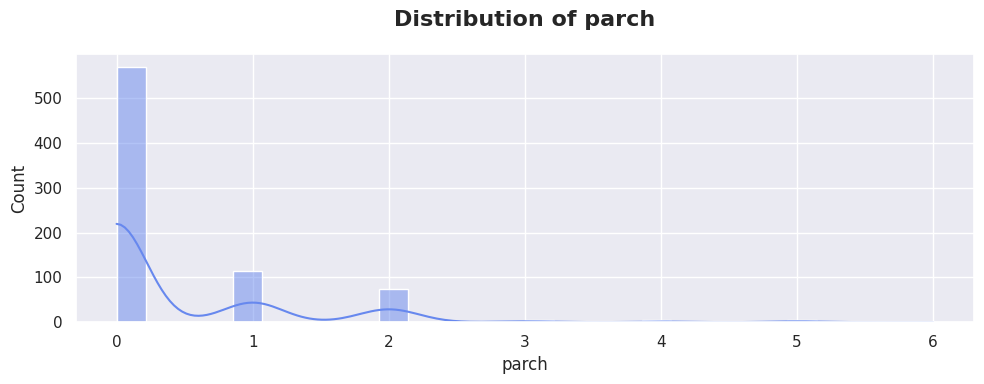

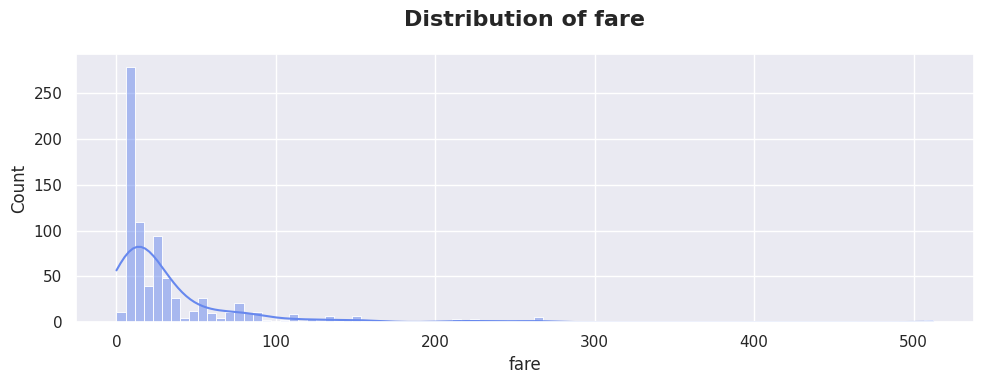

In [ ]:
# Plot distributions for numeric features
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(titanic_df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}' ,fontsize=16, fontweight='bold', pad=20)

3. **Box Plots**

Using box plots to identify outliers and visualize the spread of numeric features.

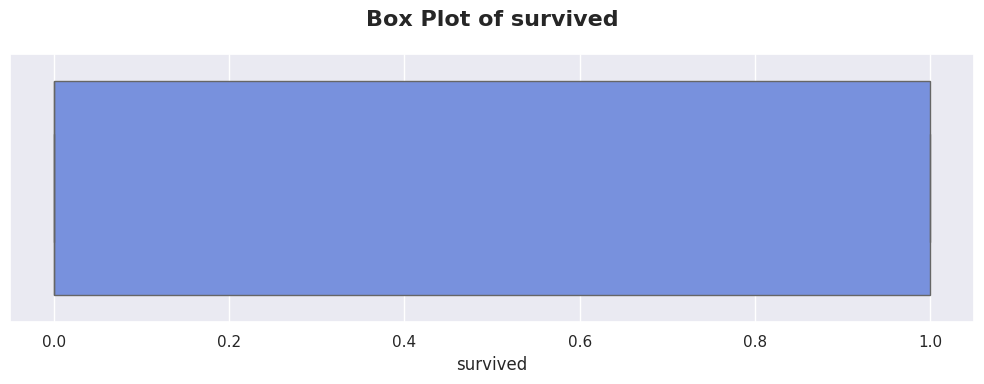

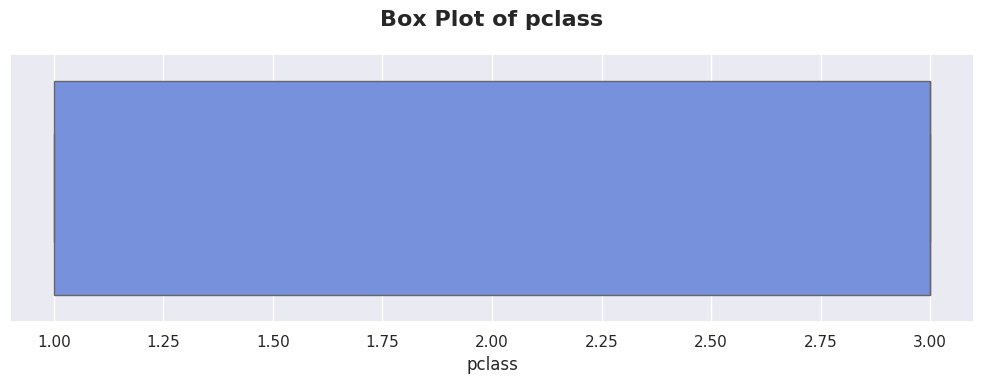

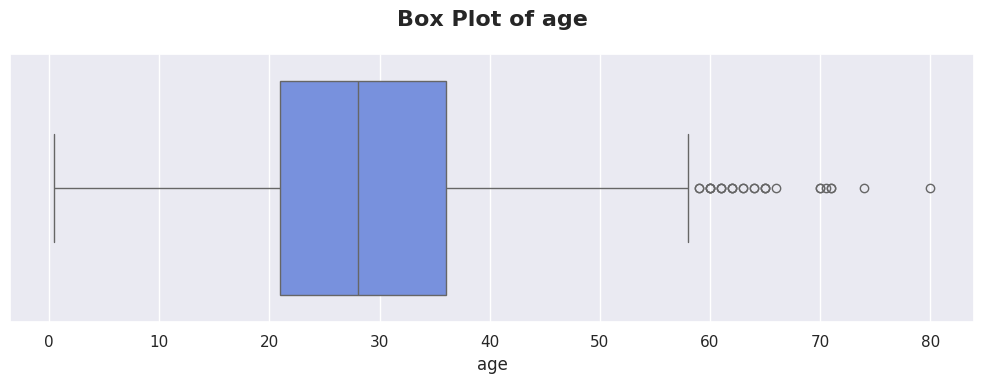

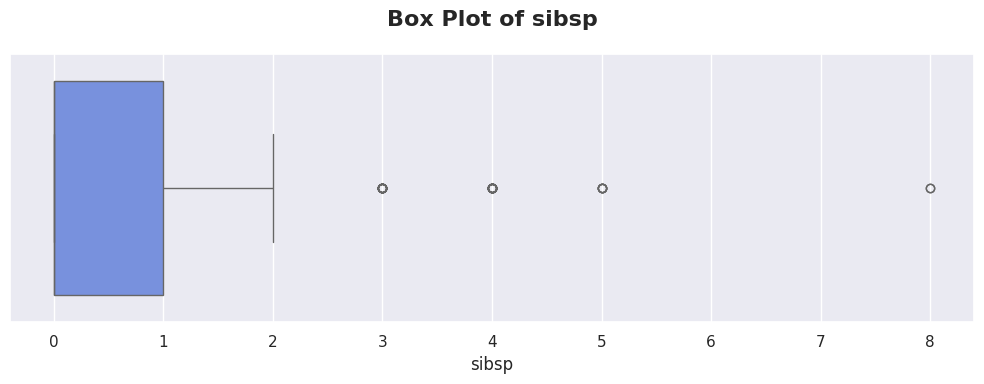

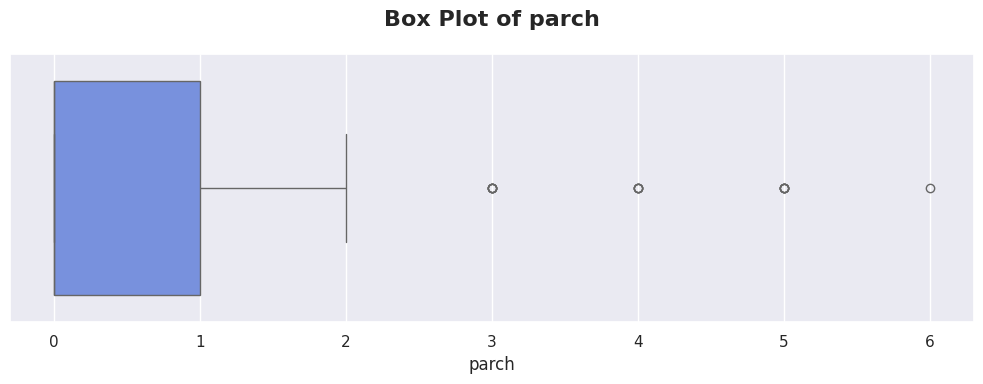

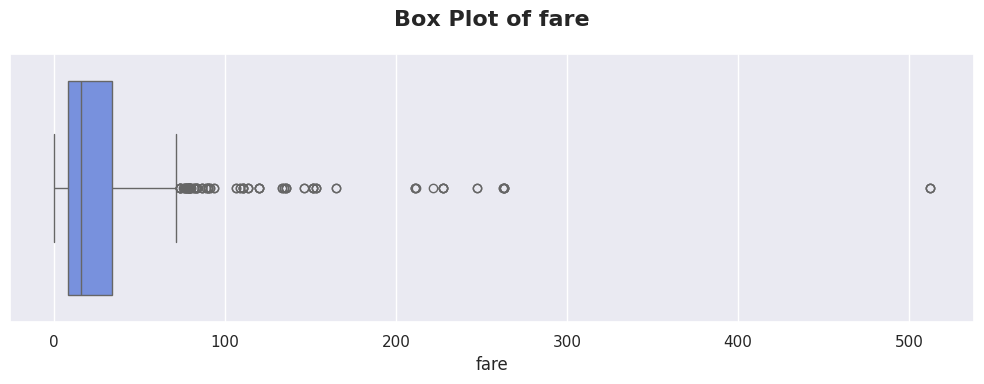

In [ ]:
# Box plots for numeric features
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=titanic_df[feature])
    plt.title(f'Box Plot of {feature}', fontsize=16, fontweight='bold', pad=20)
    plt.show()

4. **Correlation Analysis**

Examining correlations between numeric features and the target variable, and among numeric features themselves.

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.331388 -0.078114 -0.037841  0.069864  0.247159
pclass   -0.331388  1.000000 -0.342745  0.087050  0.038998 -0.554649
age      -0.078114 -0.342745  1.000000 -0.279316 -0.182697  0.092503
sibsp    -0.037841  0.087050 -0.279316  1.000000  0.379535  0.133807
parch     0.069864  0.038998 -0.182697  0.379535  1.000000  0.190823
fare      0.247159 -0.554649  0.092503  0.133807  0.190823  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

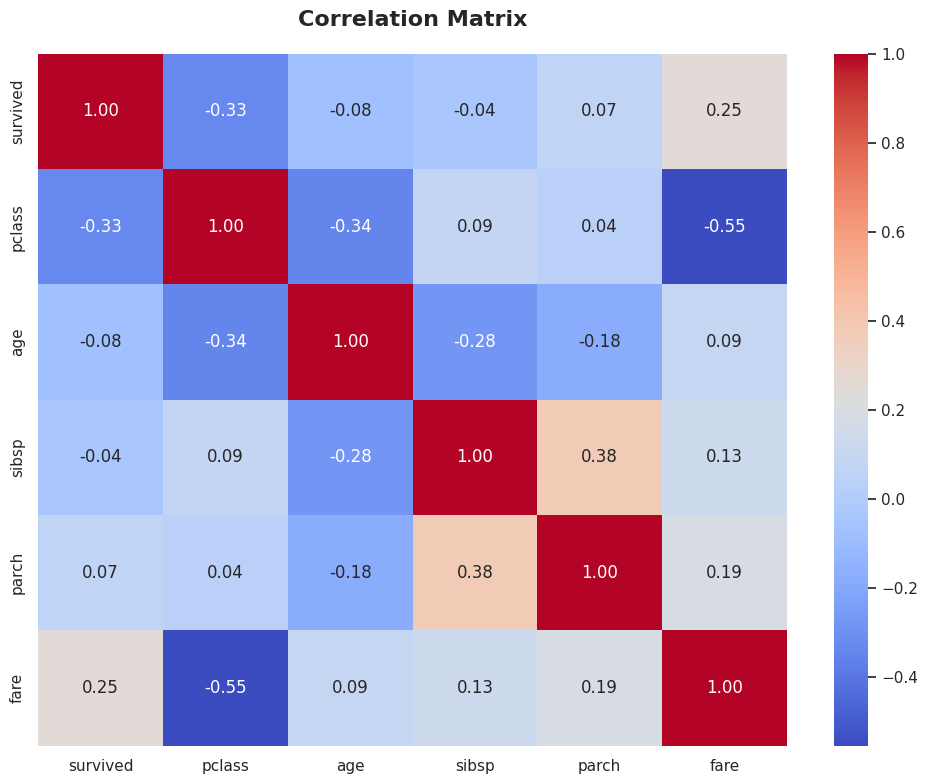

In [ ]:
# Correlation matrix
correlation_matrix = titanic_df[numeric_features].corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)

5. **Outlier Detection**

Identifying and handling outliers, which can be detected using statistical methods or visual inspection from box plots.

In [ ]:
# detecting outliers using z-score
from scipy import stats

# Computing z-scores
z_scores = stats.zscore(titanic_df[numeric_features].dropna())

# Finding outliers (z-score > 3 or < -3)
outliers = (abs(z_scores) > 3).sum(axis=0)
print("Number of outliers in each numeric feature:")
print(outliers)

Number of outliers in each numeric feature:
survived     0
pclass       0
age          4
sibsp       25
parch       15
fare        20
dtype: int64


There are a few outliers present in the dataset; however, due to the limited size of the data, I have decided not to remove them.



**Analyzing Categorical Features**

In [ ]:
# Identifying categorical features
categorical_features = titanic_df.select_dtypes(include=['object', 'category']).columns

# Unique Values Count and Frequencies
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(titanic_df[feature].value_counts(dropna=False))
    print(f"Number of unique values: {titanic_df[feature].nunique()}")


Feature: sex
sex
male      483
female    292
Name: count, dtype: int64
Number of unique values: 2

Feature: embarked
embarked
S    562
C    155
Q     58
Name: count, dtype: int64
Number of unique values: 3


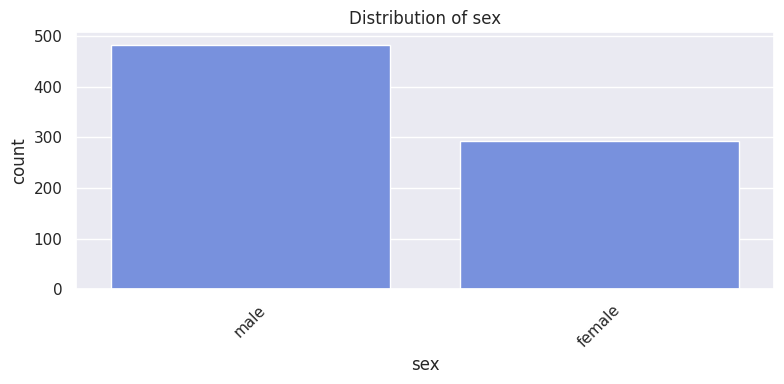

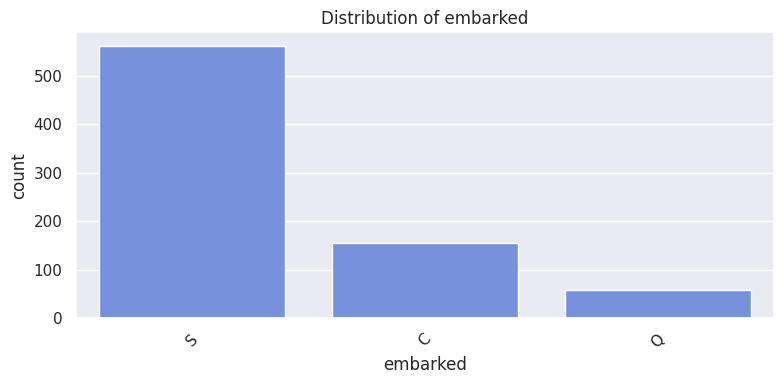

In [ ]:
# Distributions Plot for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=titanic_df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()


**Univariate Analysis**


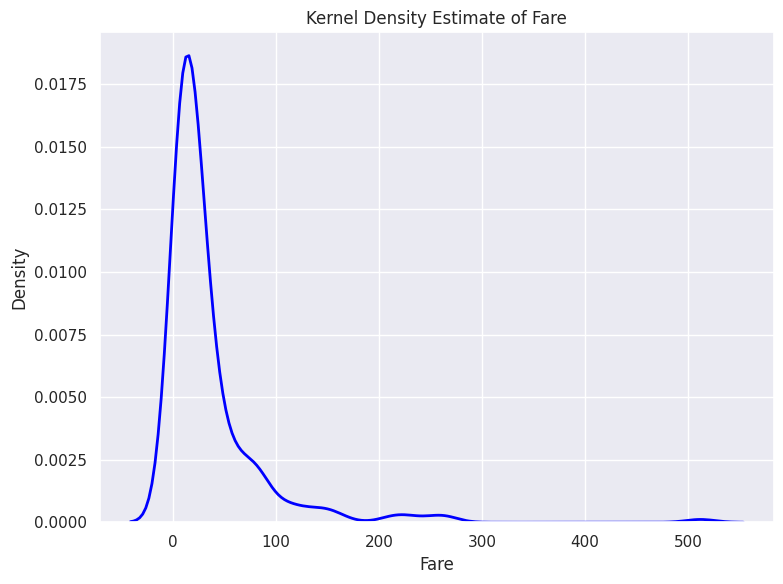

In [ ]:
# Creating a KDE plot for the 'Fare' column
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic_df['fare'], color='blue', linewidth=2)
plt.title('Kernel Density Estimate of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

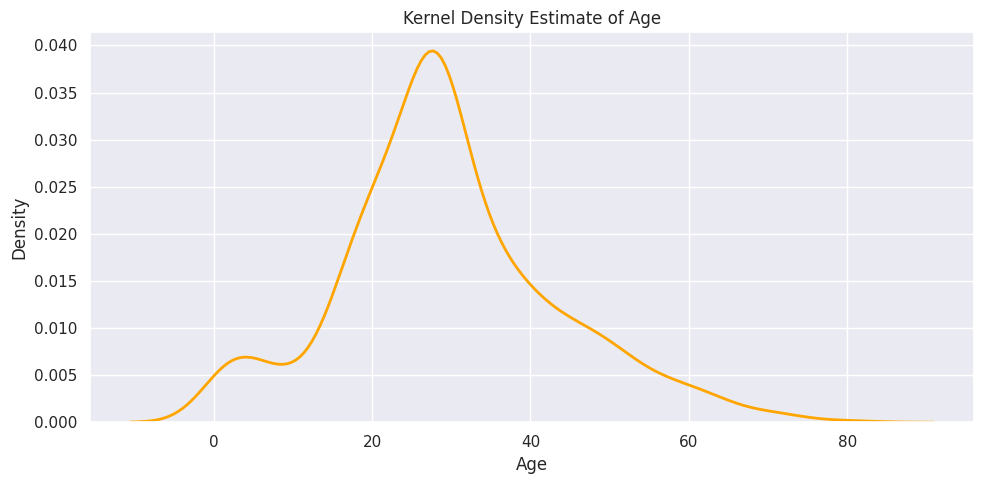

In [ ]:
# Create a KDE plot for 'Age' column
sns.kdeplot(titanic_df['age'], color='orange', linewidth=2)
plt.title('Kernel Density Estimate of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Number of Passengers')

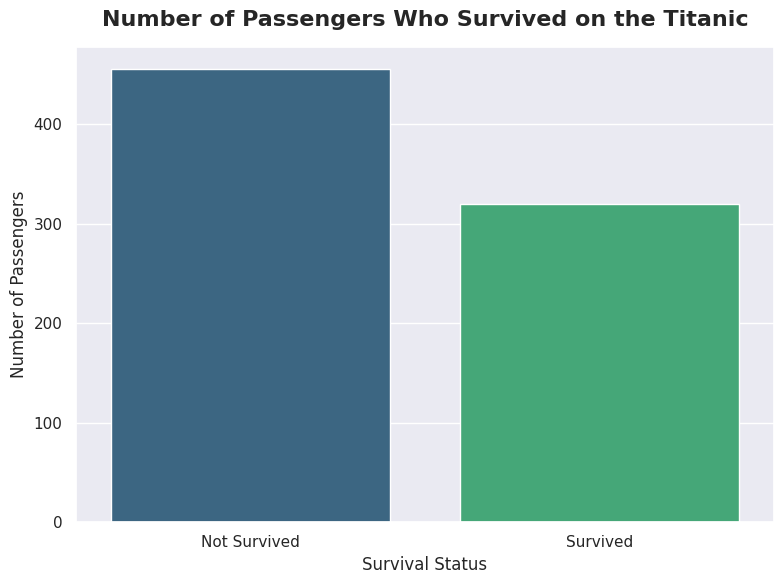

In [ ]:
# Calculating the number of passengers who survived and not survived
survival_counts = titanic_df['survived'].value_counts().sort_index()

# Defining labels
survival_labels = ['Not Survived', 'Survived']

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_labels, y=survival_counts.values, palette='viridis')
plt.title('Number of Passengers Who Survived on the Titanic', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')


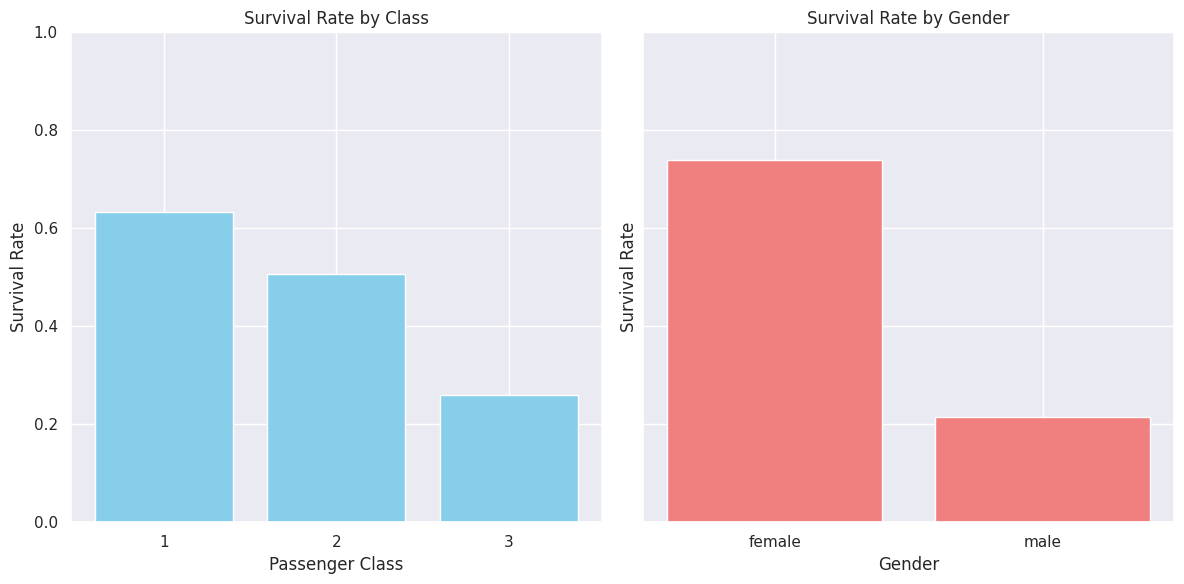

In [ ]:
# Calculating survival rates
#  by class
survival_by_class = titanic_df.groupby('pclass')['survived'].mean().reset_index()
survival_by_class.columns = ['Pclass', 'Survival Rate']
# print(survival_by_class)

# by gender
survival_by_gender = titanic_df.groupby('sex')['survived'].mean().reset_index()
survival_by_gender.columns = ['Gender', 'Survival Rate']
# print(survival_by_gender)

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar plot for survival rate by class
axes[0].bar(survival_by_class['Pclass'].astype(str), survival_by_class['Survival Rate'], color='skyblue')
axes[0].set_title('Survival Rate by Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xticks(survival_by_class['Pclass'].astype(str))
axes[0].set_ylim(0, 1)

# Bar plot for survival rate by gender
axes[1].bar(survival_by_gender['Gender'], survival_by_gender['Survival Rate'], color='lightcoral')
axes[1].set_title('Survival Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Survival Rate')
axes[1].set_ylim(0, 1)

plt.tight_layout()

**Bivariate Analysis**

Gender    female      male
Pclass                    
1       0.967742  0.367521
2       0.916667  0.184783
3       0.472441  0.160584


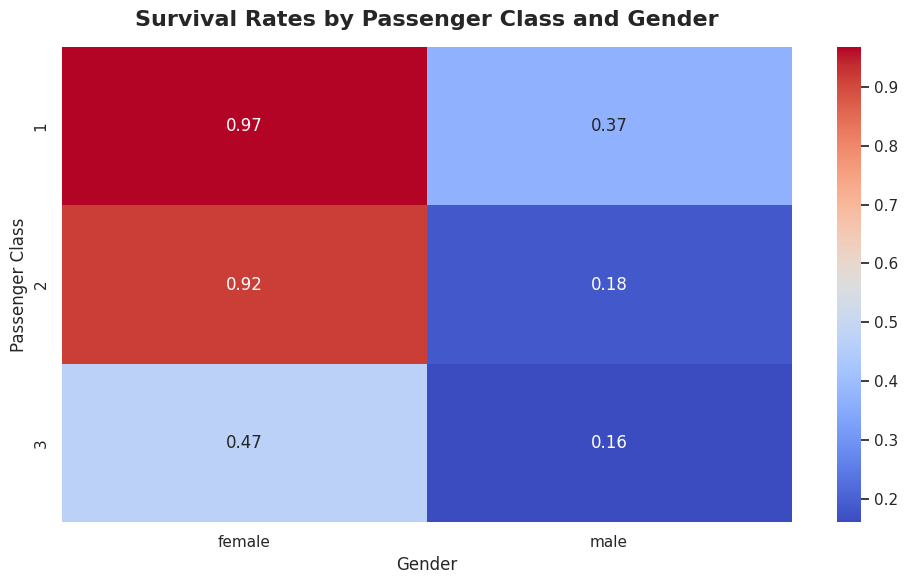

In [ ]:
# Calculating survival rates by multiple factors i.e class and gender
survival_by_class_gender = titanic_df.groupby(['pclass', 'sex'])['survived'].mean().reset_index()
survival_by_class_gender.columns = ['Pclass', 'Gender', 'Survival Rate']

# Pivot for better visualization
survival_pivot = survival_by_class_gender.pivot(index='Pclass', columns='Gender', values='Survival Rate')
print(survival_pivot)

# Plotting survival rates by class and gender
plt.figure(figsize=(10, 6))
sns.heatmap(survival_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Survival Rates by Passenger Class and Gender', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Passenger Class')
plt.xlabel('Gender')
plt.show()


**Visual Inspection**
*for scaling*

Examine the distribution and range of the numerical features:

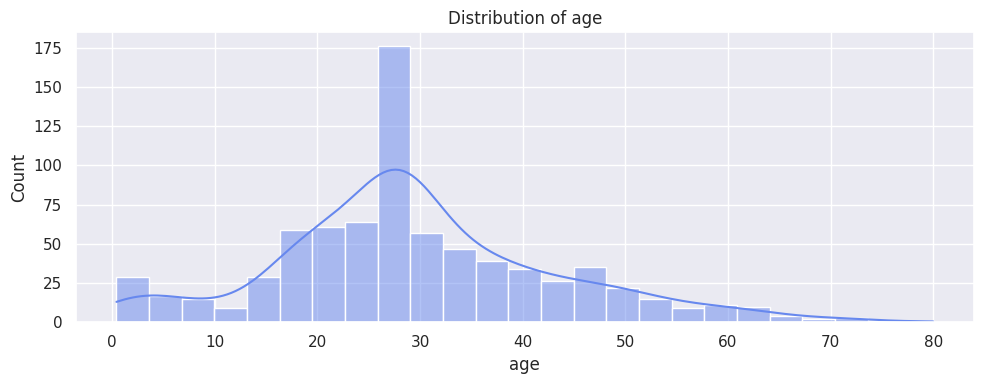

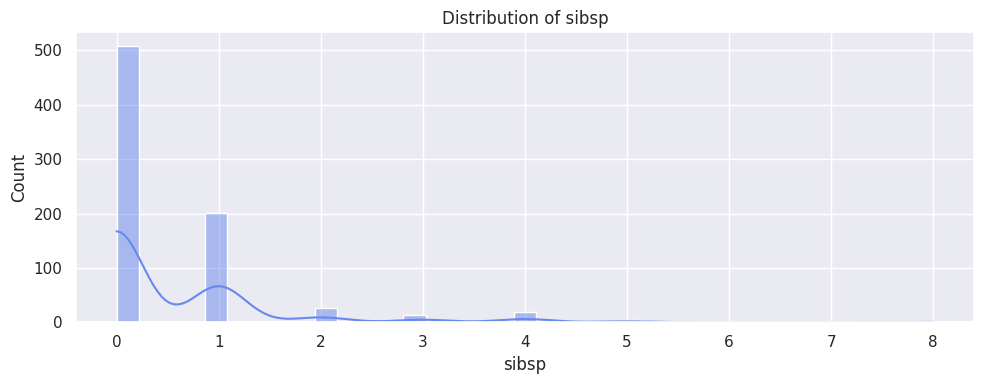

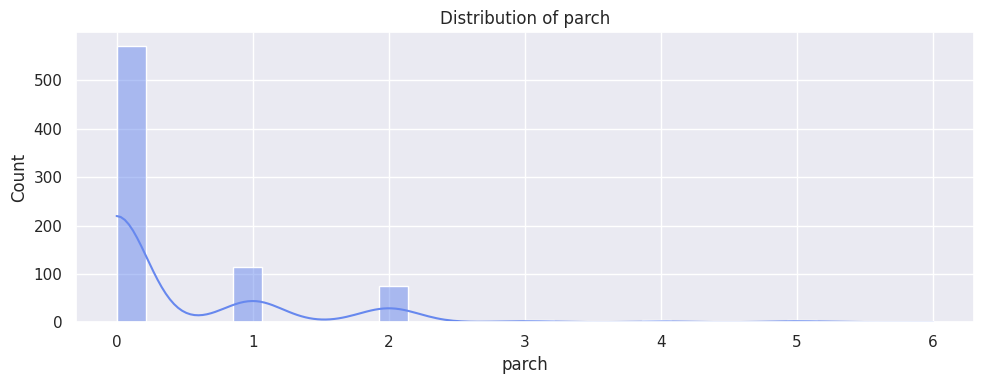

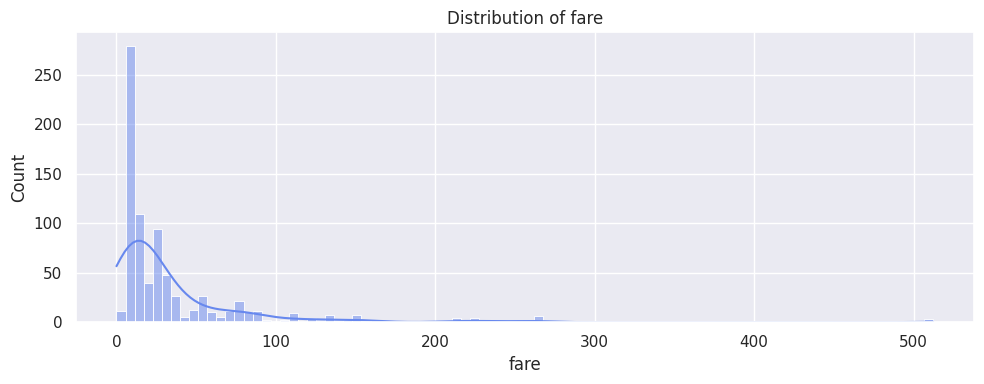

In [ ]:
# Numerical features
numerical_features = ['age', 'sibsp', 'parch', 'fare']

# Distributions Plot
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(titanic_df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

*Interpretation:* Features with different ranges (e.g., age from 0 to 80 and fare from 0 to 512) should generally be scaled to prevent one feature from dominating the others.

**Check Feature Ranges and Statistics**
*for scaling*

Compute the range and summary statistics of the features:

In [ ]:
# Summary statistics for numerical features
print(titanic_df[numerical_features].describe())

              age       sibsp       parch        fare
count  775.000000  775.000000  775.000000  775.000000
mean    29.581187    0.529032    0.420645   34.878403
std     13.766359    0.990326    0.840565   52.408474
min      0.420000    0.000000    0.000000    0.000000
25%     21.000000    0.000000    0.000000    8.050000
50%     28.000000    0.000000    0.000000   15.900000
75%     36.000000    1.000000    1.000000   34.197900
max     80.000000    8.000000    6.000000  512.329200


**Check Correlation with Target Variable**
*for scaling*

Sometimes, scaling might not be necessary if all features have similar distributions and scales:

In [ ]:
# Calculating correlation with the target variable
correlations = titanic_df[numerical_features + ['survived']].corr()['survived'].sort_values(ascending=False)
print(correlations)

survived    1.000000
fare        0.247159
parch       0.069864
sibsp      -0.037841
age        -0.078114
Name: survived, dtype: float64


#### Feature Engineering:

Categorical Encoding: Convert categorical features (sex, embarked, class, who, deck, embark_town, alive) into numerical format using techniques like one-hot encoding or label encoding.
Feature Scaling: Scale numerical features (age, fare) if required for certain algorithms.

**Encoding**

One-hot encoding for embarked and sex

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  775 non-null    int64  
 1   pclass    775 non-null    int64  
 2   sex       775 non-null    object 
 3   age       775 non-null    float64
 4   sibsp     775 non-null    int64  
 5   parch     775 non-null    int64  
 6   fare      775 non-null    float64
 7   embarked  775 non-null    object 
 8   alone     775 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 55.2+ KB


In [ ]:
# Converting boolean column to integer
titanic_df['alone'] = titanic_df['alone'].astype(int)

In [ ]:
# Performing one-hot encoding using pandas for 'embarked' and 'sex'
titanic_df_encoded = pd.get_dummies(titanic_df, columns=['embarked', 'sex'], drop_first=True,  dtype=int)
display(titanic_df_encoded)

survived  pclass   age  sibsp  parch     fare  alone  embarked_Q  \
0           0       3  22.0      1      0   7.2500      0           0   
1           1       1  38.0      1      0  71.2833      0           0   
2           1       3  26.0      0      0   7.9250      1           0   
3           1       1  35.0      1      0  53.1000      0           0   
4           0       3  35.0      0      0   8.0500      1           0   
..        ...     ...   ...    ...    ...      ...    ...         ...   
885         0       3  39.0      0      5  29.1250      0           1   
887         1       1  19.0      0      0  30.0000      1           0   
888         0       3  28.0      1      2  23.4500      0           0   
889         1       1  26.0      0      0  30.0000      1           0   
890         0       3  32.0      0      0   7.7500      1           1   

     embarked_S  sex_male  
0             1         1  
1             0         0  
2             1         0  
3             1         0  
4             1         1  
..          ...       ...  
885           0         0  
887           1         0  
888           1         0  
889           0         1  
890           0         1  

[775 rows x 10 columns]

**Standarization**


In [ ]:
titanic_df_encoded_scaled = titanic_df_encoded.copy()

# Initializing the StandardScaler
scaler = StandardScaler()

# Selecting the columns to scale
columns_to_scale = ['age', 'fare']
# Fitting and transforming the data
titanic_df_encoded_scaled[columns_to_scale] = scaler.fit_transform(titanic_df_encoded_scaled[columns_to_scale])
display(titanic_df_encoded_scaled[columns_to_scale].head())

age      fare
0 -0.551060 -0.527515
1  0.611945  0.695086
2 -0.260308 -0.514627
3  0.393881  0.347909
4  0.393881 -0.512240

In [ ]:
# Inspecting the updated DataFrame
titanic_df_encoded_scaled

survived  pclass       age  sibsp  parch      fare  alone  embarked_Q  \
0           0       3 -0.551060      1      0 -0.527515      0           0   
1           1       1  0.611945      1      0  0.695086      0           0   
2           1       3 -0.260308      0      0 -0.514627      1           0   
3           1       1  0.393881      1      0  0.347909      0           0   
4           0       3  0.393881      0      0 -0.512240      1           0   
..        ...     ...       ...    ...    ...       ...    ...         ...   
885         0       3  0.684632      0      5 -0.109851      0           1   
887         1       1 -0.769123      0      0 -0.093144      1           0   
888         0       3 -0.114933      1      2 -0.218205      0           0   
889         1       1 -0.260308      0      0 -0.093144      1           0   
890         0       3  0.175818      0      0 -0.517968      1           1   

     embarked_S  sex_male  
0             1         1  
1             0         0  
2             1         0  
3             1         0  
4             1         1  
..          ...       ...  
885           0         0  
887           1         0  
888           1         0  
889           0         1  
890           0         1  

[775 rows x 10 columns]

#### Model Development & Evaluation:

In [ ]:
# Taking dataframe we had encoded
titanic_df_encoded = titanic_df_encoded.copy()

# Implementing logistic regression

# 1. Preparing data
X = titanic_df_encoded.iloc[:,1:]
# X = titanic_df_encoded[:-1].dropna()
y = titanic_df_encoded.loc[X.index, 'survived']
# display(X.head())
# display(y.head())

# 2. Splitting Data:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Without scaling
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy without scaling: {accuracy_score(y_test, y_pred):.2f}')

Accuracy without scaling: 0.85


In [ ]:
# Taking dataframe we had scaled before
scaled_df = titanic_df_encoded_scaled.copy()

# Implementing logistic regression

#  1. Preparing data
X = scaled_df.iloc[:,1:]
y = scaled_df.loc[X.index, 'survived']
# display(X.head())
# display(y.head())

# 2. Splitting Data:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# With scaling
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_scaled = model.predict(X_test)
print(f'Accuracy with scaling: {accuracy_score(y_test, y_pred_scaled):.2f}')

# Note: we can apply scaling after train_test_split too
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Accuracy with scaling: 0.85


*Interpretation:* Comparing the accuracies. The scaling did not improve performance, it's likely not necessary for our model.


**Evaluating a classification model using the ROC (Receiver Operating Characteristic) curve and the AUC (Area Under the Curve) involves assessing the model's ability to distinguish between positive and negative classes**

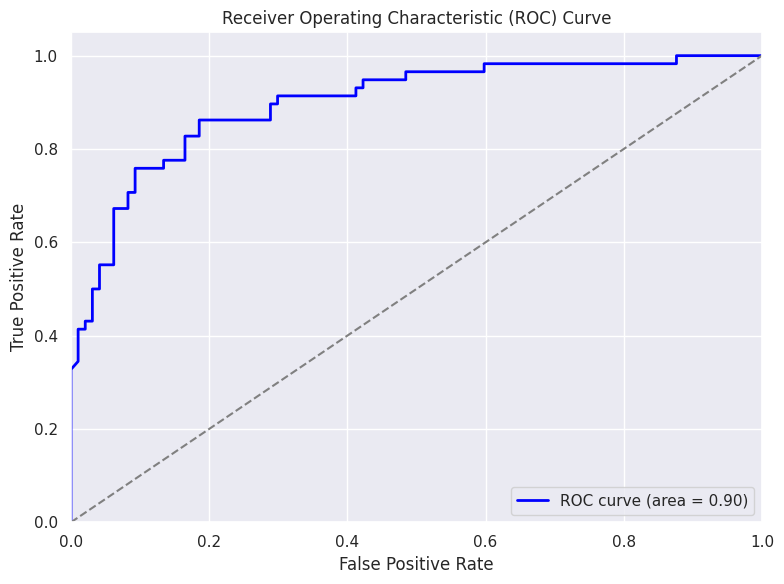

In [ ]:
# Evaluating the model using ROC-AUC

# Calculating the predicted probabilities for the positive class (survived)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ROC-AUC Score:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.8989512975471028
0.8989512975471028


**Interpreting the ROC Curve and AUC**

- ROC Curve:

  - A curve closer to the top-left corner indicates a better model.

  - The area under the curve (AUC) quantifies the overall performance.
  
- AUC:

  - 0.5: The model is not better than random guessing.
  - 0.7-0.8: Indicates a fair to good model.
  - 0.8-0.9: Indicates a good model.
-'>0.9: Indicates an excellent model.

**Interpretation of roc_auc score:**
- roc_auc = 0.89:
    - The AUC score of 0.89 indicates that the model is very good at distinguishing between the positive and negative classes. This means that, on average, the model correctly ranks a randomly chosen positive instance higher than a randomly chosen negative instance with an 89% probability.
    
 - An AUC score of around 0.65 suggests that the model has some discriminatory power but is not very strong. It indicates that the model is better than random guessing but still has room for improvement.

## **4. Classifying Emails as Spam Using Decision Trees 📧**

This is binary classification problem.


#### Data Understanding


In [ ]:
display('Shape of Data:',mail_spam_df.shape)
display('Columns:', mail_spam_df.columns)
display('Data types:',mail_spam_df.dtypes)
display('Preview of data -Head:',mail_spam_df.head())
display('Preview of data -Tail:',mail_spam_df.tail())
display('Info:',mail_spam_df.info())
display('Summary Stats:',mail_spam_df.describe())
display('Missing Values:',mail_spam_df.isnull().sum())
display('Duplicate Values:',mail_spam_df.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(5572, 2)

'Columns:'

Index(['Category', 'Message'], dtype='object')

'Data types:'

Category    object
Message     object
dtype: object

'Preview of data -Head:'

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

'Preview of data -Tail:'

Category                                            Message
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


'Info:'

None

'Summary Stats:'

Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30

'Missing Values:'

Category    0
Message     0
dtype: int64

'Duplicate Values:'

415

#### Preprocessing:

In [ ]:
# Preprocessing Step
# Handle missing values if any.
# Standardize features.
# Encode categorical variables if present.

##### Handling missing values

- No Missing Values Detected: The dataset contains no missing values that require handling.


##### Visualization

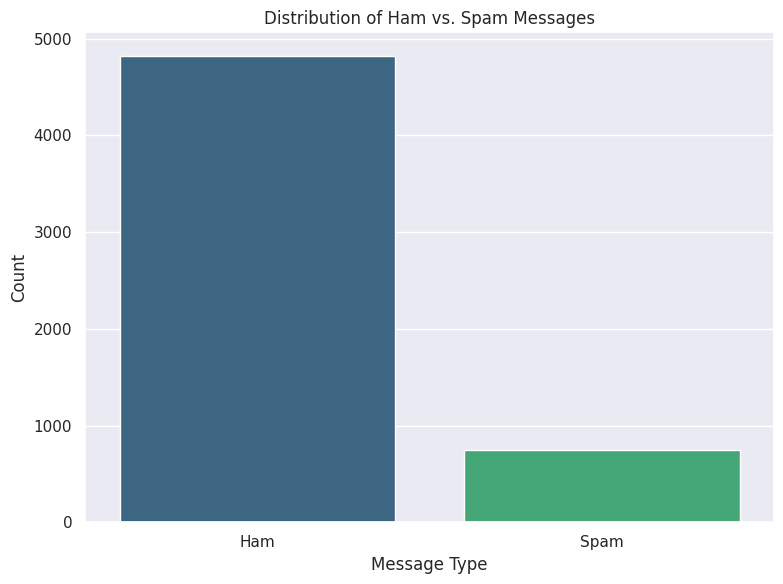

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Spam', data=mail_spam_df, palette='viridis')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Ham vs. Spam Messages')
plt.show()

I am choosing to proceed with the imbalanced dataset for the following reasons:

-  My initial goal is to establish a baseline performance with the existing data. This helps us understand the model's behavior and performance with the raw dataset before considering any adjustments for class imbalance.

- I aim to maintain the dataset's quality and integrity without introducing potential biases from resampling methods.

By proceeding with the imbalanced dataset, we can gain insights into the model's initial performance and address class imbalance issues if necessary during further analysis.

##### Encoding


In [ ]:
# Converting categorical 'Category' to binary labels
mail_spam_df['Spam']=mail_spam_df['Category'].apply(lambda x:1 if x=='spam' else 0)  # assign 0 and 1 labels
mail_spam_df.head(5)

Category                                            Message  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0

##### Standarization

  - It is not required for this problem

#### Model Development & Evaluation:

In [ ]:
# Implementing a decision tree classifier to classify emails

# Splitting the data into features and target
X = mail_spam_df['Message']
y = mail_spam_df['Spam']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization(FE): Converting Text Data into Token Count Matrices Using CountVectorizer
vectorizer = CountVectorizer()   # Convert the text into matrics
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Decision tree with entropy
dtree_model = DecisionTreeClassifier(
            criterion = "entropy", random_state = 123,
            max_depth = 10, min_samples_leaf = 6)

# Training a decision tree classifier
dtree_model.fit(X_train_vectorized, y_train)

# Prediction using entropy
y_pred = dtree_model.predict(X_test_vectorized)

In [ ]:
# Evaluating the model using precision, recall, and F1-score.
evaluate_model_performance(y_test, y_pred, dataset_name='Spam Classification', labels=['Ham', 'Spam'])

Spam Classification Accuracy: 97.04%
Spam Classification Precision: 97.05%
Spam Classification Recall: 97.04%

Spam Classification Confusion Matrix:

[[963   3]
 [ 30 119]]

Spam Classification Classification Report:

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.98      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



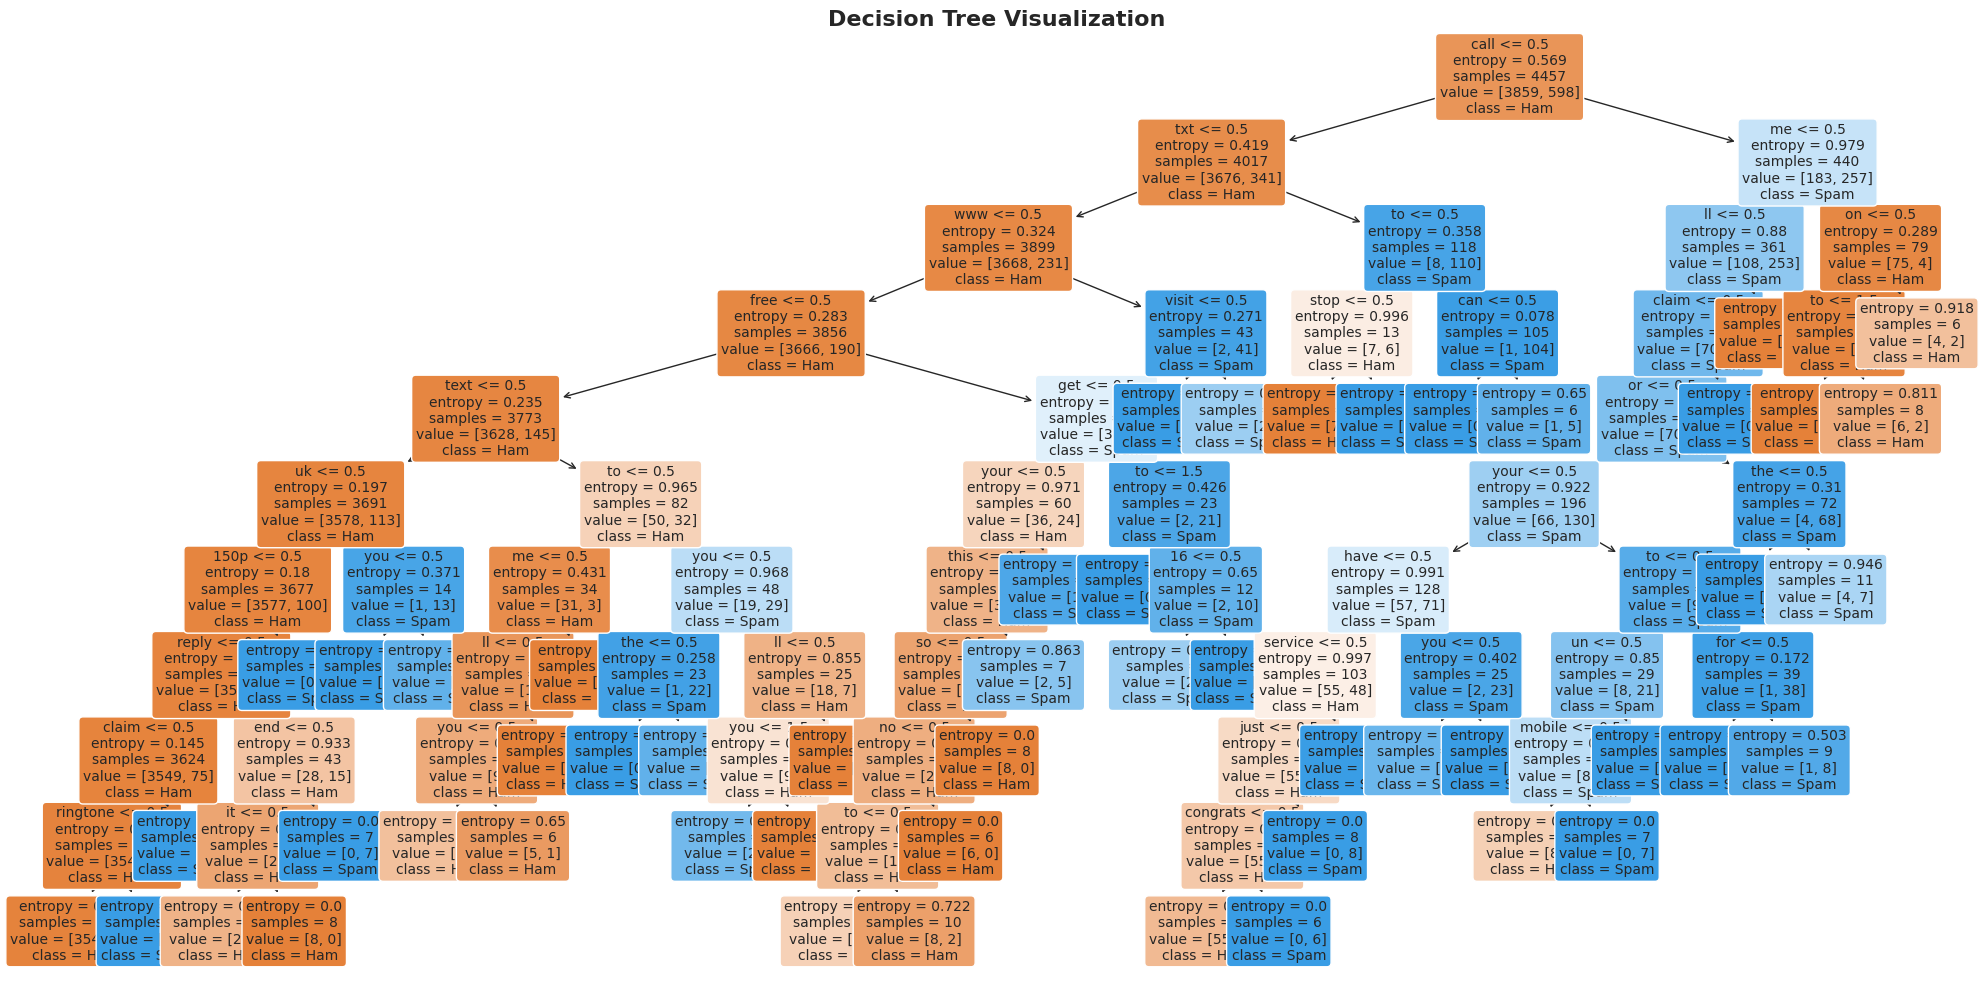

In [ ]:
# Plotting the decision tree
feature_names = vectorizer.get_feature_names_out()  # Get feature names from vectorizer
class_names = ['Ham', 'Spam']  # Define class names i.e ['0', '1']

plt.figure(figsize=(20, 10))
plot_tree(dtree_model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          fontsize=10,
          rounded=True)
plt.title('Decision Tree Visualization', fontsize=16,fontweight='bold')
plt.savefig('decision_tree_visualization.pdf')
plt.show()

In [ ]:
# Printing the decision tree rules as text
# tree_rules = export_text(dtree_model, feature_names=list(X.columns))
tree_rules = export_text(dtree_model, feature_names=feature_names)
print(tree_rules)

|--- call <= 0.50
|   |--- txt <= 0.50
|   |   |--- www <= 0.50
|   |   |   |--- free <= 0.50
|   |   |   |   |--- text <= 0.50
|   |   |   |   |   |--- uk <= 0.50
|   |   |   |   |   |   |--- 150p <= 0.50
|   |   |   |   |   |   |   |--- reply <= 0.50
|   |   |   |   |   |   |   |   |--- claim <= 0.50
|   |   |   |   |   |   |   |   |   |--- ringtone <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- ringtone >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- claim >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- reply >  0.50
|   |   |   |   |   |   |   |   |--- end <= 0.50
|   |   |   |   |   |   |   |   |   |--- it <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- it >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- end >  0.50
|   |   |   | 

## **5. Predicting Customer Satisfaction Using Logistic Regression 😊**

This is binary-class/ classification problem.

> Customer Satisfaction is measurement that helps businesses understand how happy and satisfied customers are with their products, services, and/or capabilities.


So, for this task I conducted an analysis and prediction on a restaurant customer dataset focusing on customer satisfaction. 🍽️





#### Data Understanding:


In [ ]:
display('Shape of Data:',custmr_satisfaction_df.shape)
display('Columns:', custmr_satisfaction_df.columns)
display('Data types:',custmr_satisfaction_df.dtypes)
display('Preview of data -Head:',custmr_satisfaction_df.head())
display('Preview of data -Tail:',custmr_satisfaction_df.tail())
display('Info:',custmr_satisfaction_df.info())
display('Summary Stats:',custmr_satisfaction_df.describe())
display('Missing Values:',custmr_satisfaction_df.isnull().sum())
display('Duplicate Values:',custmr_satisfaction_df.duplicated().sum())   # duplicate_rows

'Shape of Data:'

(1500, 19)

'Columns:'

Index(['CustomerID', 'Age', 'Gender', 'Income', 'VisitFrequency',
       'AverageSpend', 'PreferredCuisine', 'TimeOfVisit', 'GroupSize',
       'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder',
       'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating',
       'AmbianceRating', 'HighSatisfaction'],
      dtype='object')

'Data types:'

CustomerID                int64
Age                       int64
Gender                   object
Income                    int64
VisitFrequency           object
AverageSpend            float64
PreferredCuisine         object
TimeOfVisit              object
GroupSize                 int64
DiningOccasion           object
MealType                 object
OnlineReservation         int64
DeliveryOrder             int64
LoyaltyProgramMember      int64
WaitTime                float64
ServiceRating             int64
FoodRating                int64
AmbianceRating            int64
HighSatisfaction          int64
dtype: object

'Preview of data -Head:'

CustomerID  Age  Gender  Income VisitFrequency  AverageSpend  \
0         654   35    Male   83380         Weekly     27.829142   
1         655   19    Male   43623         Rarely    115.408622   
2         656   41  Female   83737         Weekly    106.693771   
3         657   43    Male   96768         Rarely     43.508508   
4         658   55  Female   67937        Monthly    148.084627   

  PreferredCuisine TimeOfVisit  GroupSize DiningOccasion  MealType  \
0          Chinese   Breakfast          3       Business  Takeaway   
1         American      Dinner          1         Casual   Dine-in   
2         American      Dinner          6    Celebration   Dine-in   
3           Indian       Lunch          1    Celebration   Dine-in   
4          Chinese   Breakfast          1       Business  Takeaway   

   OnlineReservation  DeliveryOrder  LoyaltyProgramMember   WaitTime  \
0                  0              1                     1  43.523929   
1                  0              0                     0  57.524294   
2                  0              1                     0  48.682623   
3                  0              0                     0   7.552993   
4                  0              0                     1  37.789041   

   ServiceRating  FoodRating  AmbianceRating  HighSatisfaction  
0              2           5               4                 0  
1              5           5               3                 0  
2              3           4               5                 0  
3              4           5               1                 0  
4              2           3               5                 0

'Preview of data -Tail:'

CustomerID  Age  Gender  Income VisitFrequency  AverageSpend  \
1495        2149   39    Male  114857        Monthly    163.015254   
1496        2150   37  Female  133506         Weekly    190.991911   
1497        2151   46    Male  119159        Monthly    150.088604   
1498        2152   24    Male   27970         Weekly    196.363626   
1499        2153   51    Male  148333         Weekly    171.119498   

     PreferredCuisine TimeOfVisit  GroupSize DiningOccasion  MealType  \
1495         American       Lunch          2       Business   Dine-in   
1496          Italian       Lunch          4         Casual  Takeaway   
1497         American       Lunch          4         Casual   Dine-in   
1498          Italian      Dinner          6         Casual   Dine-in   
1499          Chinese   Breakfast          4         Casual   Dine-in   

      OnlineReservation  DeliveryOrder  LoyaltyProgramMember   WaitTime  \
1495                  0              1                     1   7.206275   
1496                  0              0                     0  37.863952   
1497                  0              1                     0   3.925785   
1498                  1              1                     0  24.228038   
1499                  1              1                     1  39.402163   

      ServiceRating  FoodRating  AmbianceRating  HighSatisfaction  
1495              1           2               1                 0  
1496              5           2               2                 0  
1497              3           3               3                 1  
1498              2           2               4                 1  
1499              4           5               4                 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

'Info:'

None

'Summary Stats:'

CustomerID          Age         Income  AverageSpend    GroupSize  \
count  1500.000000  1500.000000    1500.000000   1500.000000  1500.000000   
mean   1403.500000    43.832000   85921.890000    105.659004     5.035333   
std     433.157015    14.967157   38183.051749     52.381849     2.558864   
min     654.000000    18.000000   20012.000000     10.306127     1.000000   
25%    1028.750000    31.750000   52444.000000     62.287907     3.000000   
50%    1403.500000    44.000000   85811.000000    104.626408     5.000000   
75%    1778.250000    57.000000  119159.250000    148.649330     7.000000   
max    2153.000000    69.000000  149875.000000    199.973527     9.000000   

       OnlineReservation  DeliveryOrder  LoyaltyProgramMember     WaitTime  \
count        1500.000000    1500.000000           1500.000000  1500.000000   
mean            0.296667       0.405333              0.480000    30.163550   
std             0.456941       0.491120              0.499766    17.214184   
min             0.000000       0.000000              0.000000     0.001380   
25%             0.000000       0.000000              0.000000    15.235423   
50%             0.000000       0.000000              0.000000    30.044055   
75%             1.000000       1.000000              1.000000    45.285649   
max             1.000000       1.000000              1.000000    59.970762   

       ServiceRating   FoodRating  AmbianceRating  HighSatisfaction  
count    1500.000000  1500.000000     1500.000000       1500.000000  
mean        3.044000     2.997333        2.987333          0.134000  
std         1.423405     1.418920        1.450716          0.340766  
min         1.000000     1.000000        1.000000          0.000000  
25%         2.000000     2.000000        2.000000          0.000000  
50%         3.000000     3.000000        3.000000          0.000000  
75%         4.000000     4.000000        4.000000          0.000000  
max         5.000000     5.000000        5.000000          1.000000

'Missing Values:'

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

'Duplicate Values:'

0

#### Preprocessing Steps:


In [ ]:
# Handle missing values (e.g., fill missing values with median).
# Encode categorical variables (e.g., one-hot encoding for region).
# Standardize numerical features.

##### Handling missing & duplicate values

   - There were no null and duplicate values to be handled.

##### Dropping Unnecessary Columns

In [ ]:
custmr_satisfaction_df.drop(columns=['CustomerID'], inplace = True)

##### EDA

In [ ]:
# Statistics for numerical & categorical variables
print("\nStatistics Summary for numerical features:")
print(custmr_satisfaction_df.describe())

print("\nSummary statistics for categorical features:")
custmr_satisfaction_df.describe(include=['object', 'category'])


Statistics Summary for numerical features:
               Age         Income  AverageSpend    GroupSize  \
count  1500.000000    1500.000000   1500.000000  1500.000000   
mean     43.832000   85921.890000    105.659004     5.035333   
std      14.967157   38183.051749     52.381849     2.558864   
min      18.000000   20012.000000     10.306127     1.000000   
25%      31.750000   52444.000000     62.287907     3.000000   
50%      44.000000   85811.000000    104.626408     5.000000   
75%      57.000000  119159.250000    148.649330     7.000000   
max      69.000000  149875.000000    199.973527     9.000000   

       OnlineReservation  DeliveryOrder  LoyaltyProgramMember     WaitTime  \
count        1500.000000    1500.000000           1500.000000  1500.000000   
mean            0.296667       0.405333              0.480000    30.163550   
std             0.456941       0.491120              0.499766    17.214184   
min             0.000000       0.000000              0.000000     0

Gender VisitFrequency PreferredCuisine TimeOfVisit DiningOccasion  \
count     1500           1500             1500        1500           1500   
unique       2              4                5           3              3   
top     Female         Weekly          Italian   Breakfast    Celebration   
freq       759            606              325         506            519   

       MealType  
count      1500  
unique        2  
top     Dine-in  
freq        751

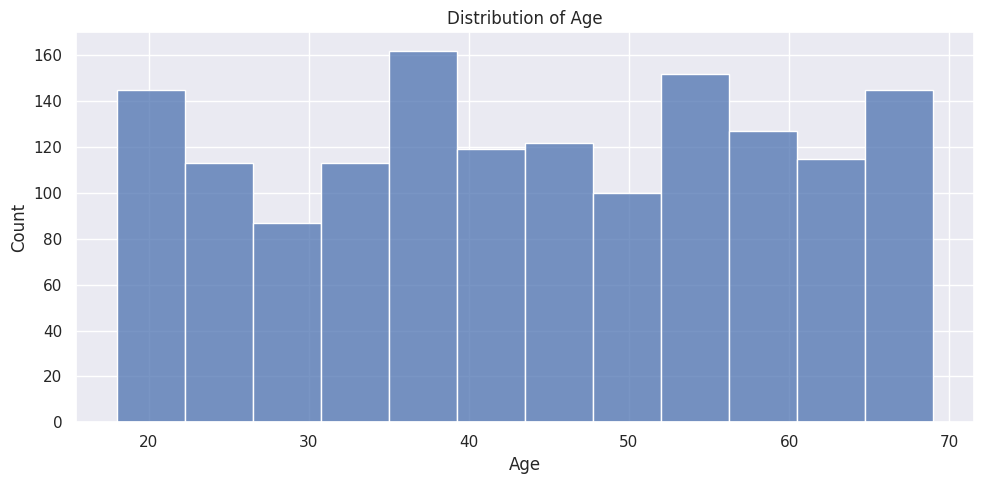

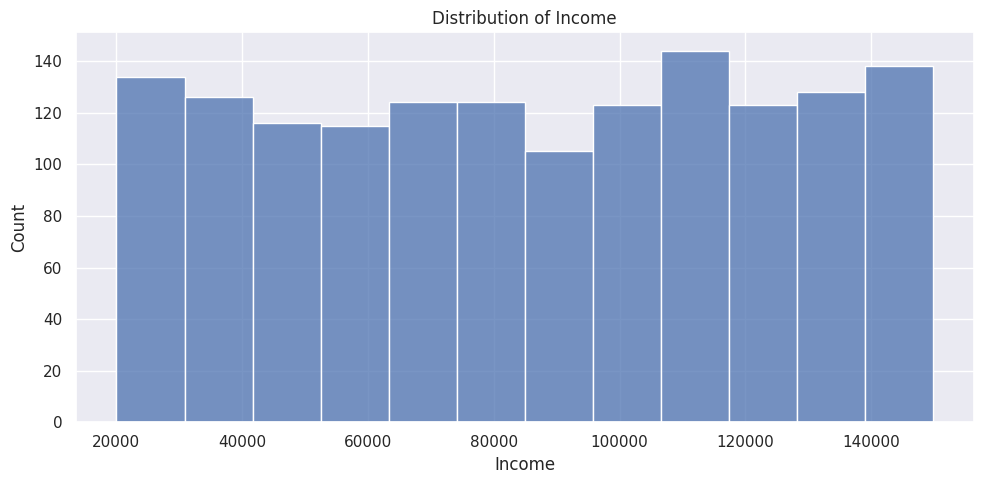

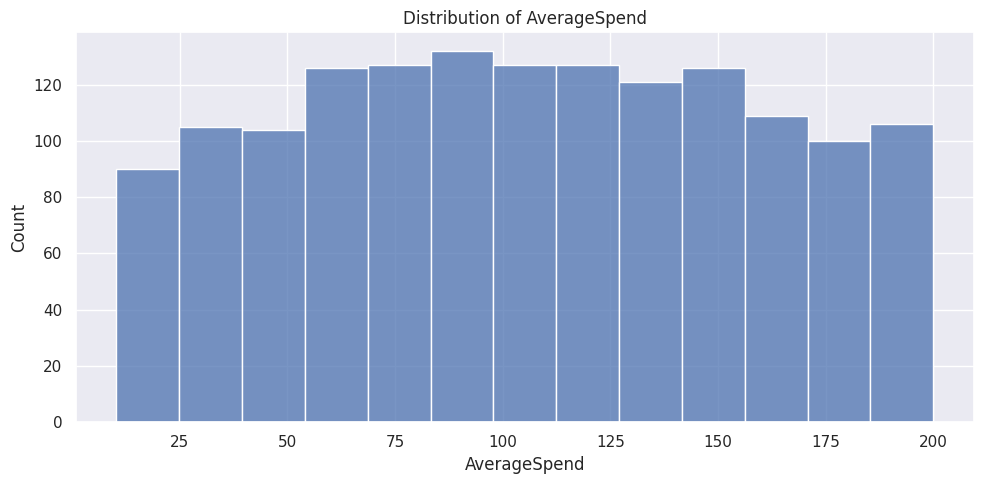

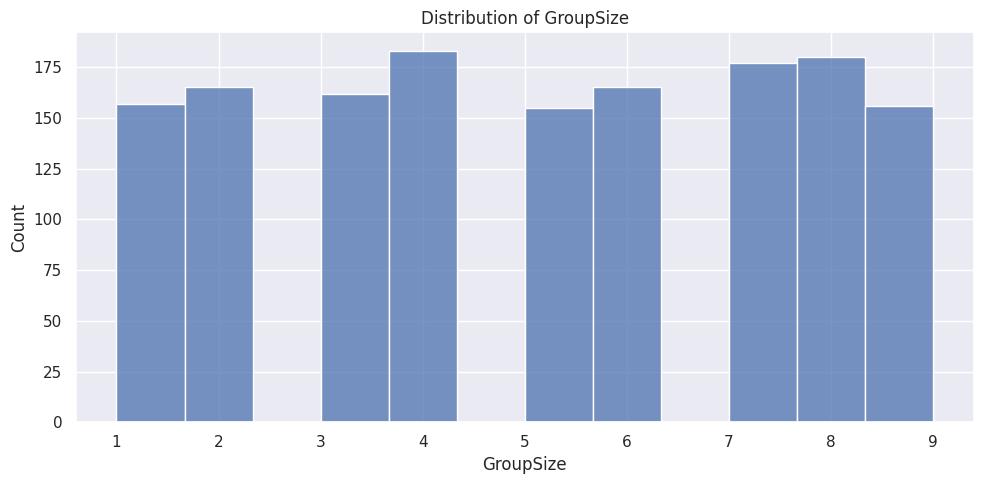

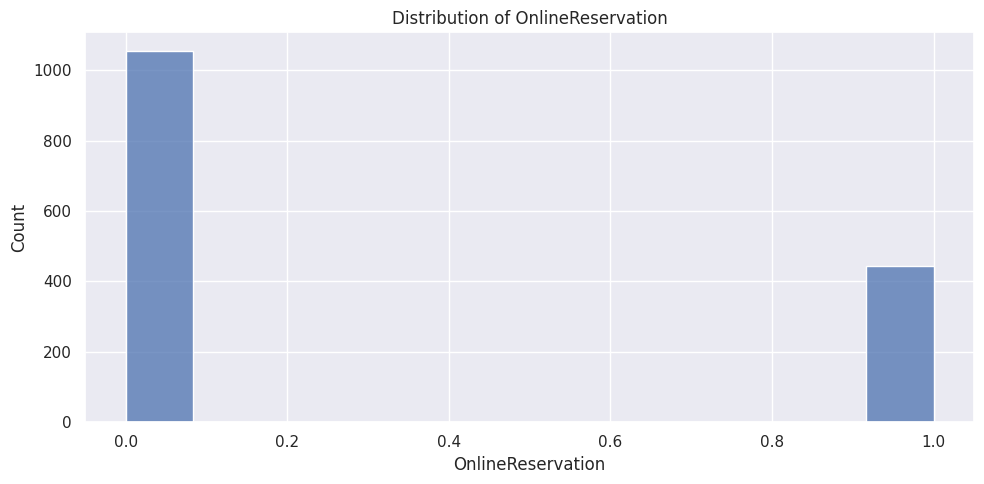

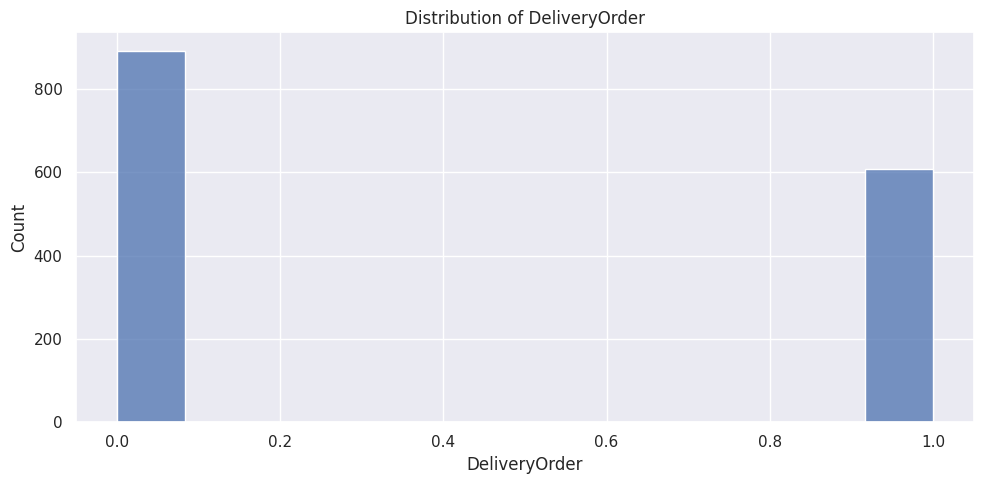

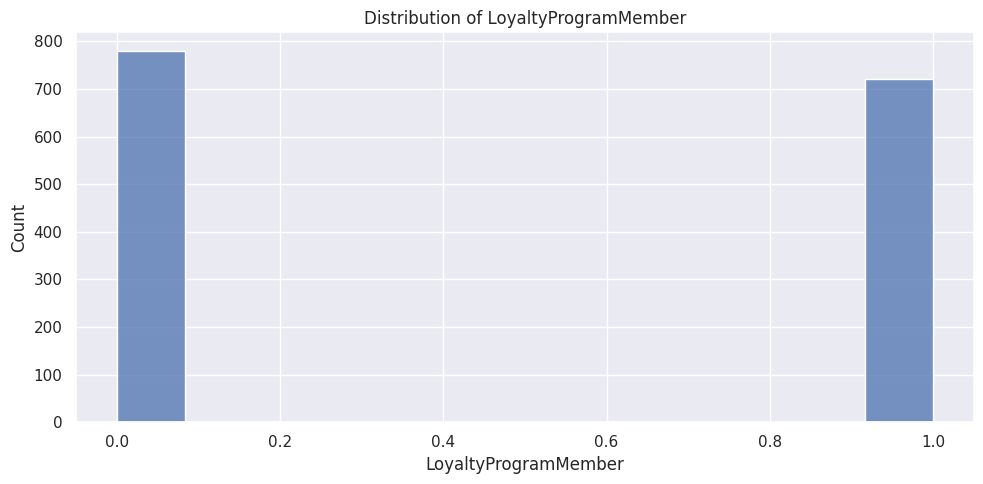

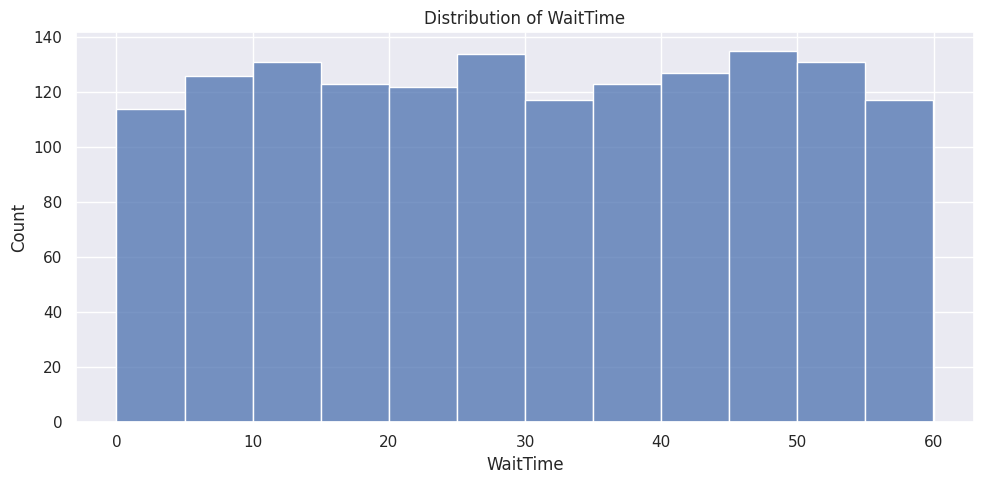

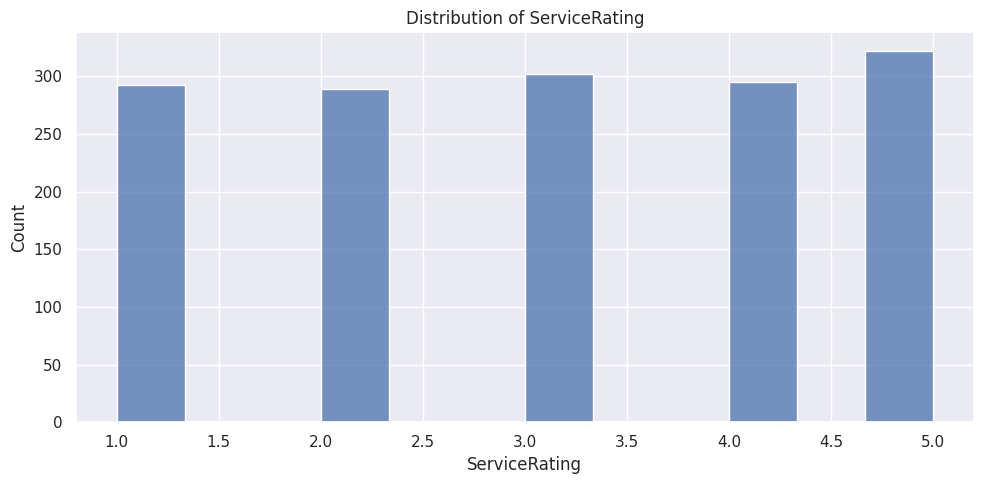

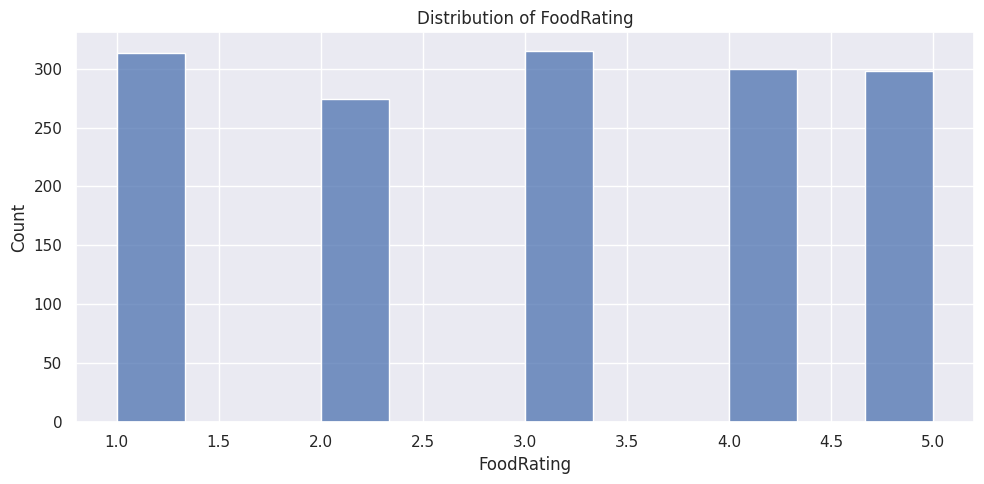

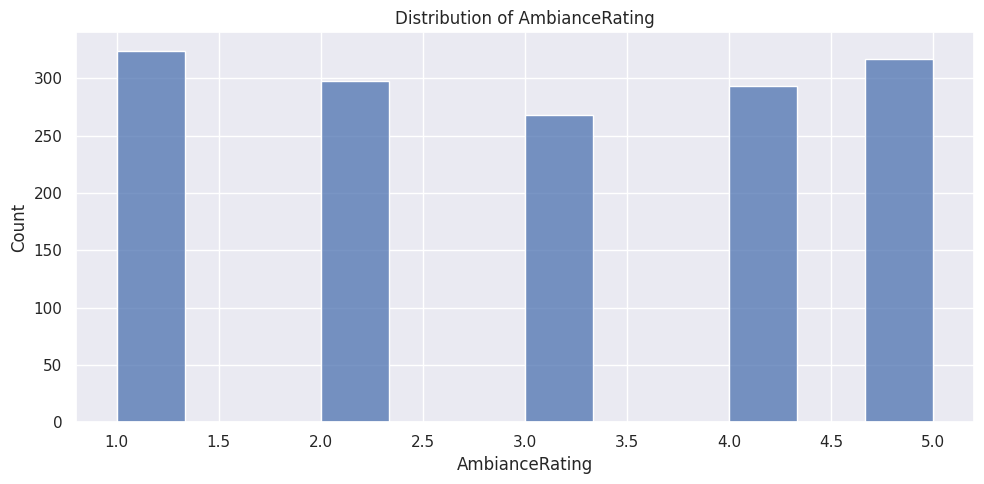

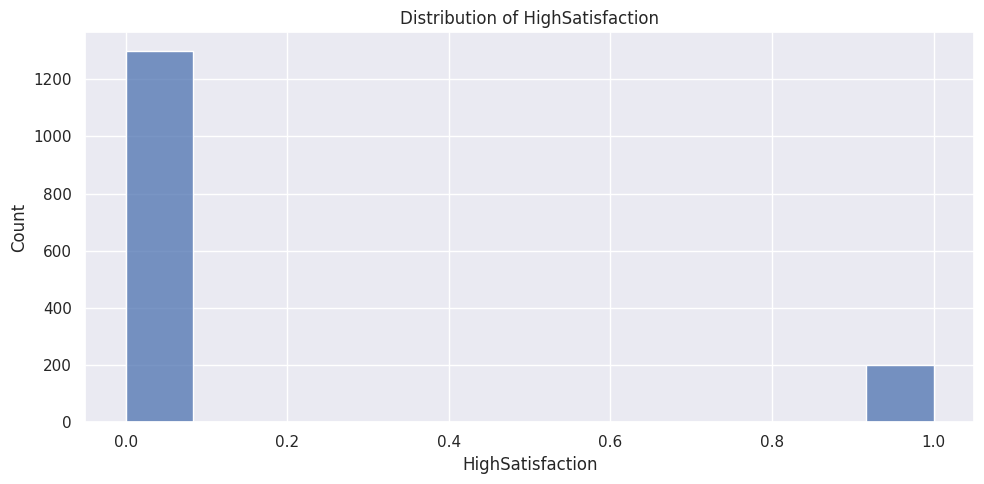

In [ ]:
# Distribution analysis

numerical_features = custmr_satisfaction_df.select_dtypes('number').columns   # List of numerical variables
for column in numerical_features:
    plt.figure()
    sns.histplot(custmr_satisfaction_df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

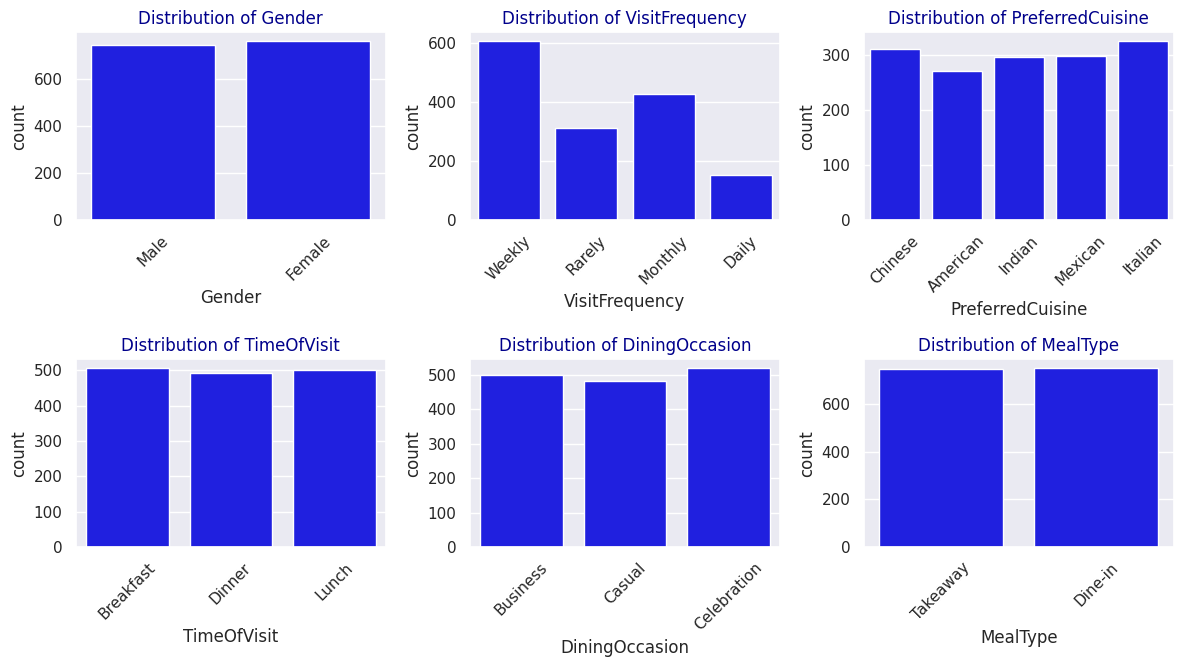

In [ ]:
# Bar plots for categorical features
cat_var = custmr_satisfaction_df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 9))
for i, var in enumerate(cat_var):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=custmr_satisfaction_df[var],color='blue')
    plt.title(f'Distribution of {var}', fontsize =12, color='darkblue' )
    plt.xticks(rotation=45)
plt.tight_layout()

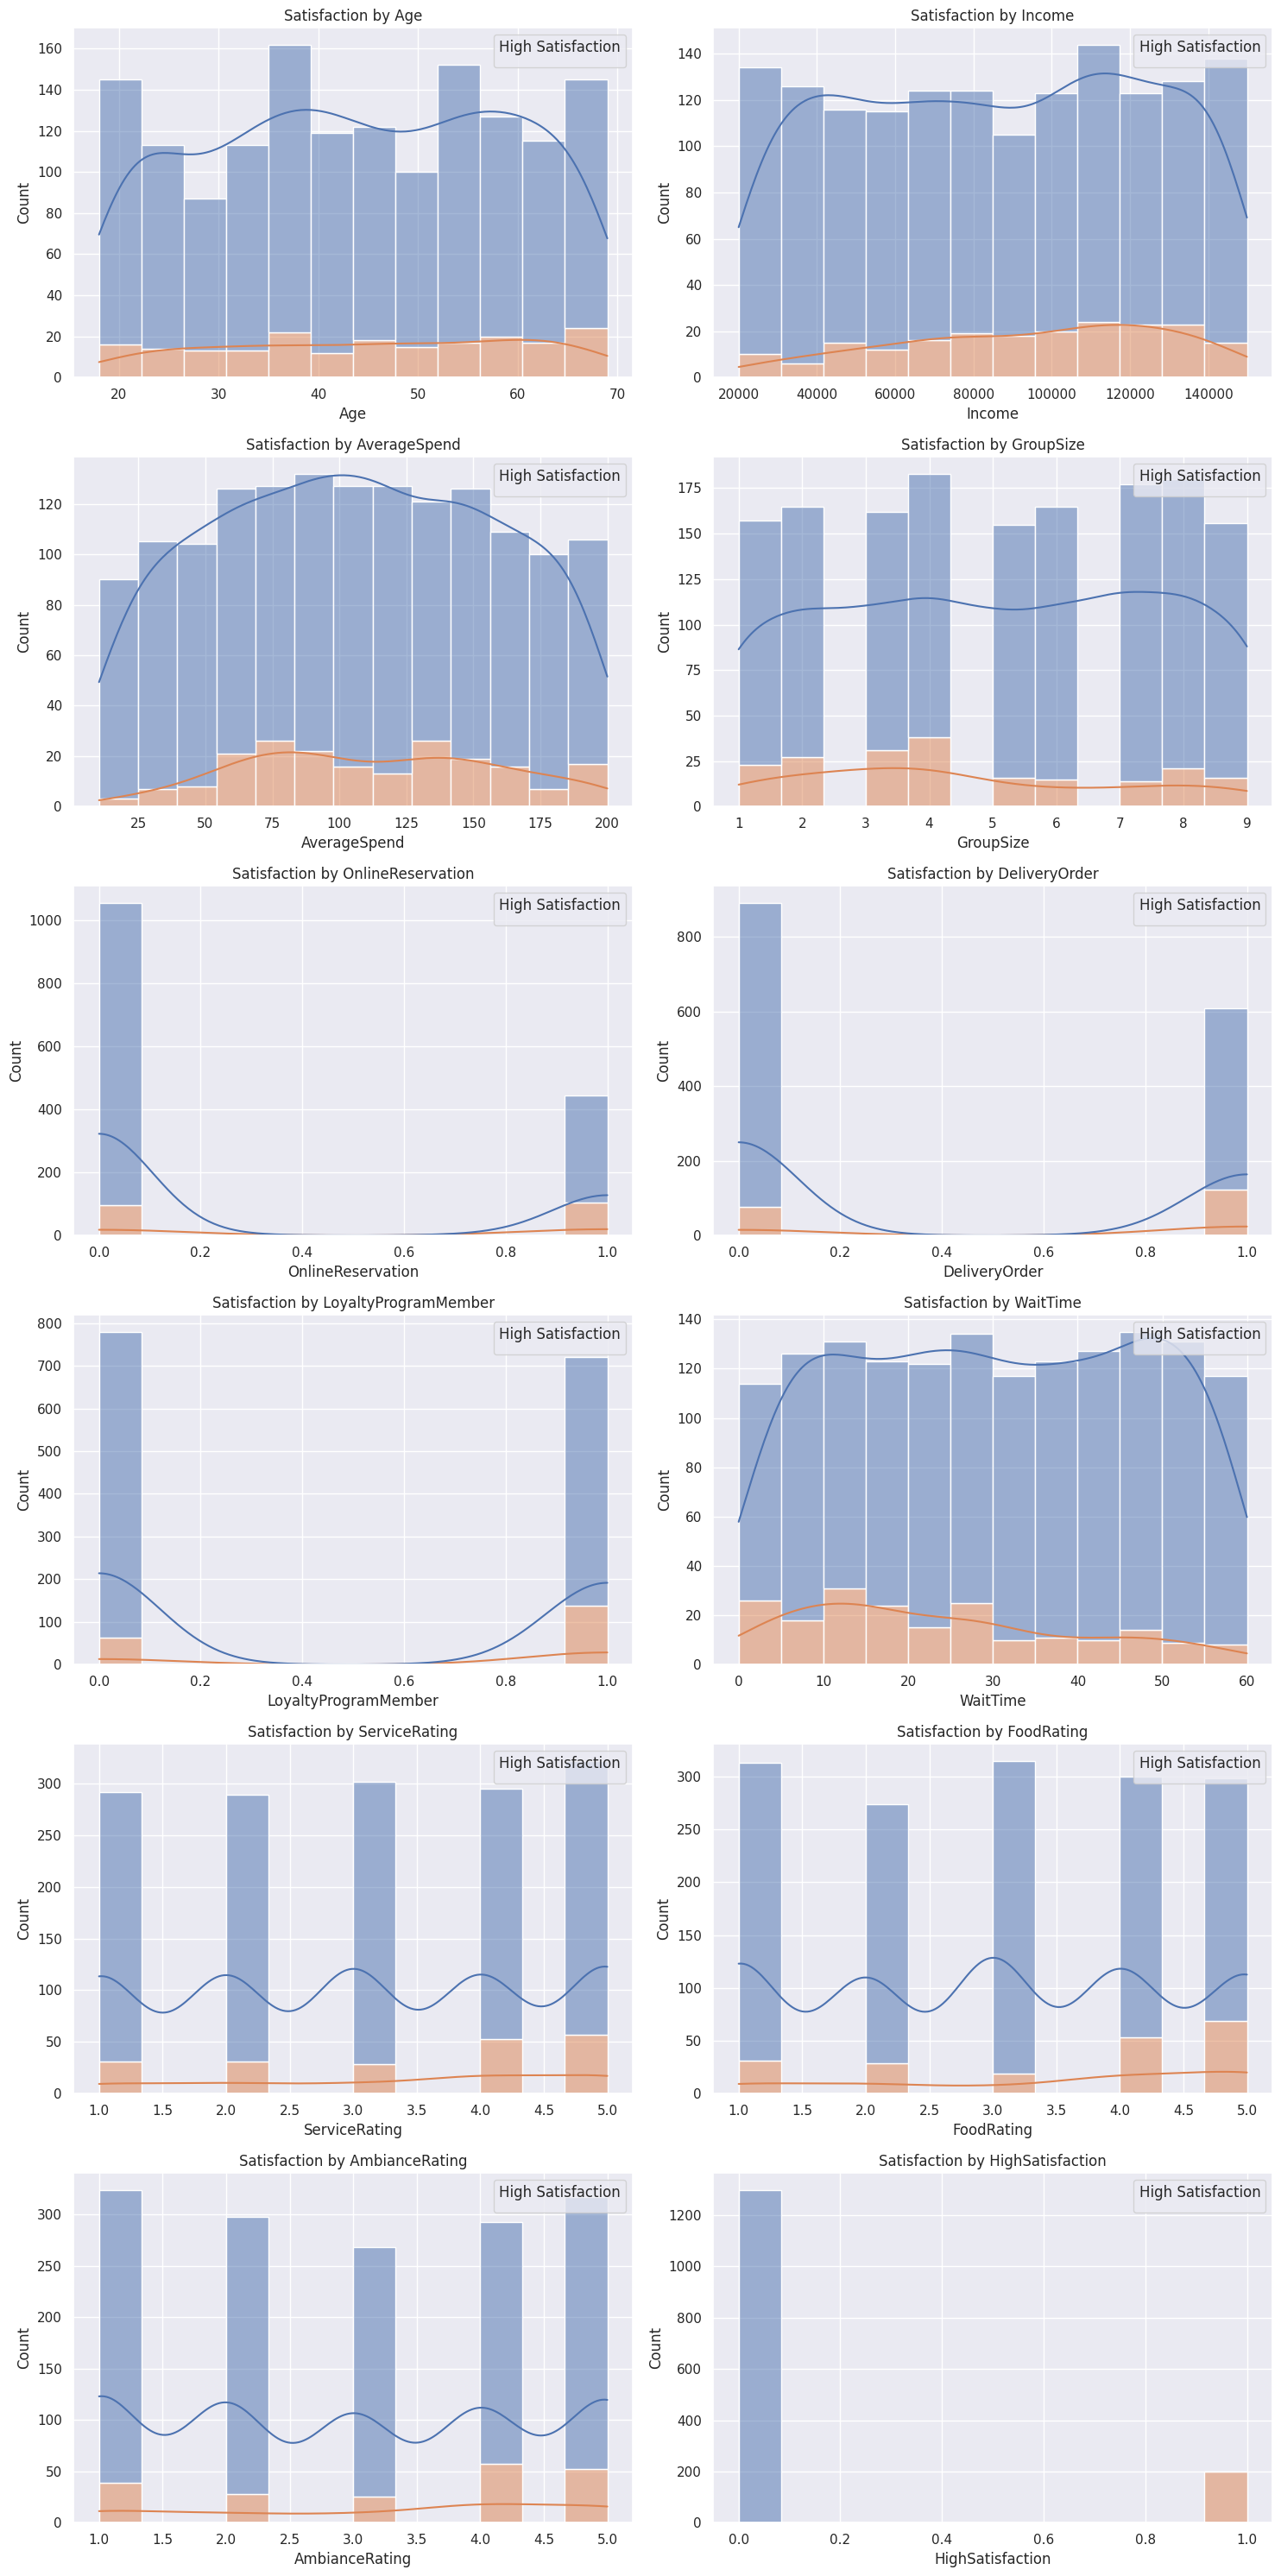

In [ ]:
# HighSatisfaction with Numerical Variables
# Set up for the matplotlib figure
n_cols = 2
n_rows = (len(numerical_features) + n_cols - 1) // n_cols   # Calculates number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel()

# Histograms
for i, feature in enumerate(numerical_features):
    sns.histplot(data=custmr_satisfaction_df, x=feature, hue="HighSatisfaction", multiple="stack", ax=axes[i], kde=True)
    axes[i].set_title(f"Satisfaction by {feature}")
    axes[i].legend(title='High Satisfaction', loc='upper right')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
   # Manually set legend labels
    handles, labels = axes[i].get_legend_handles_labels()
    if labels:
        axes[i].legend(handles, labels, title='High Satisfaction', loc='upper right')

# Empty subplots removing
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()


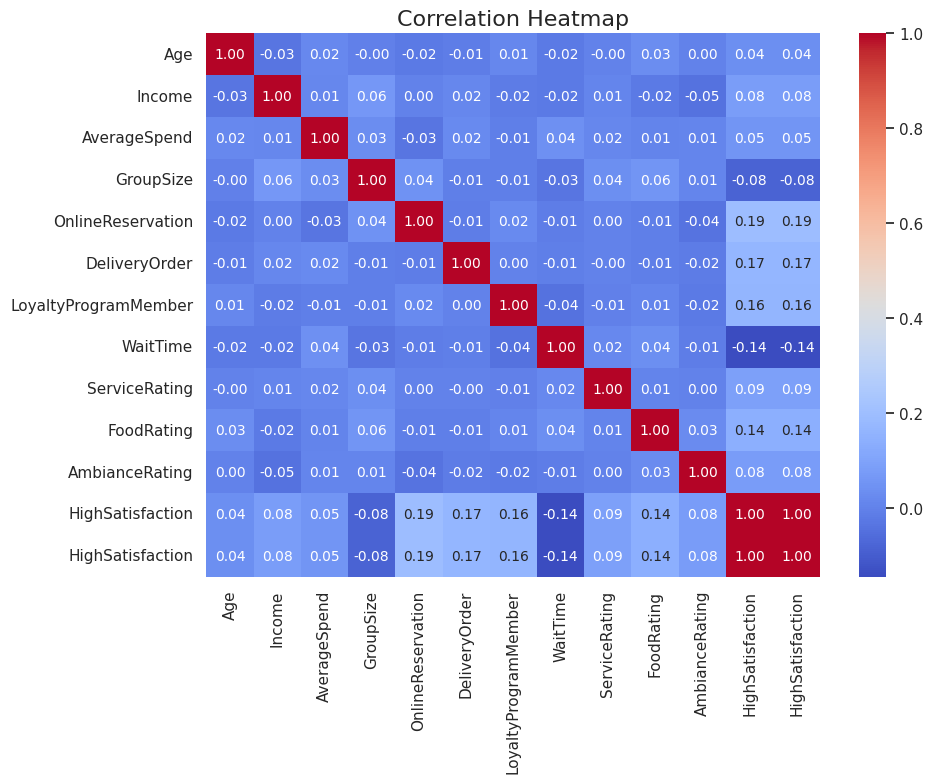

In [ ]:
# Correlation analysis (excluding non-numeric columns)
numeric_data = custmr_satisfaction_df[numerical_features.tolist() + ['HighSatisfaction']]  # Convert Index to list
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize": 10}, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

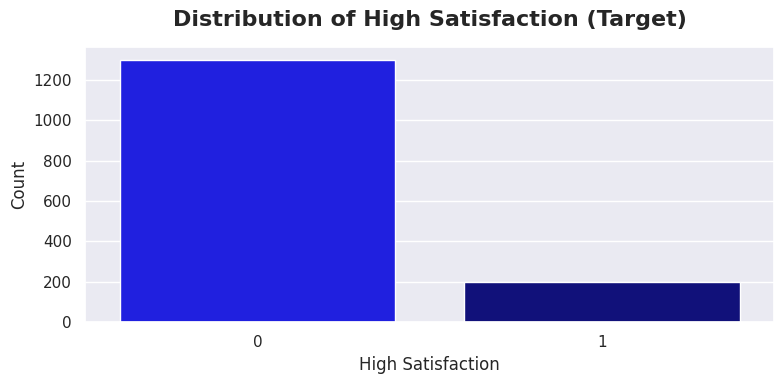

In [ ]:
# Checking distribution of target variable

# Plotting the countplot
plt.figure(figsize=(8, 4))
sns.countplot(x=custmr_satisfaction_df['HighSatisfaction'], palette=['blue','darkblue'])
plt.title('Distribution of High Satisfaction (Target)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('High Satisfaction')
plt.ylabel('Count')
plt.show()

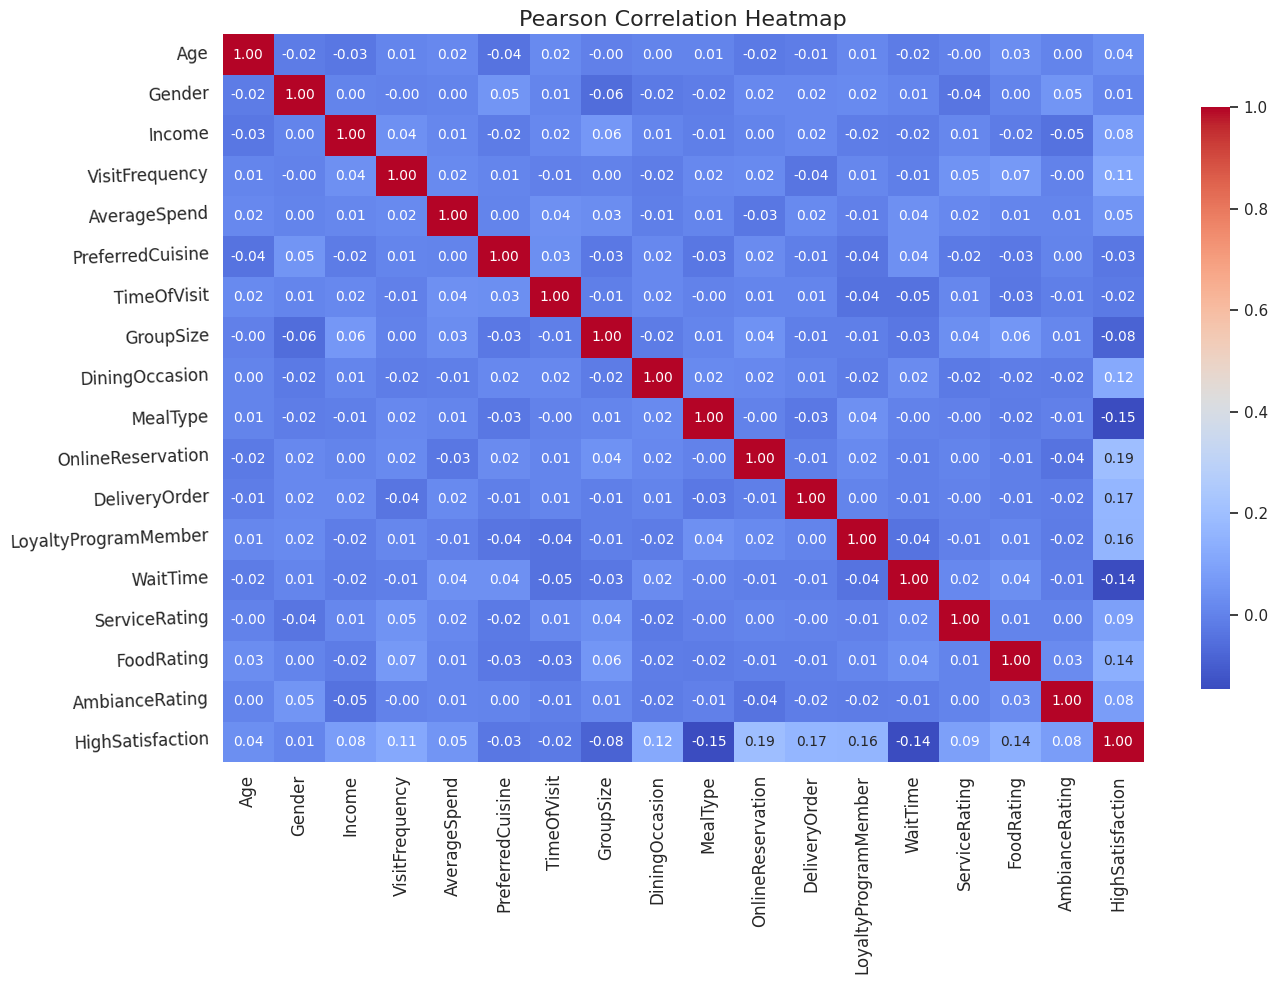

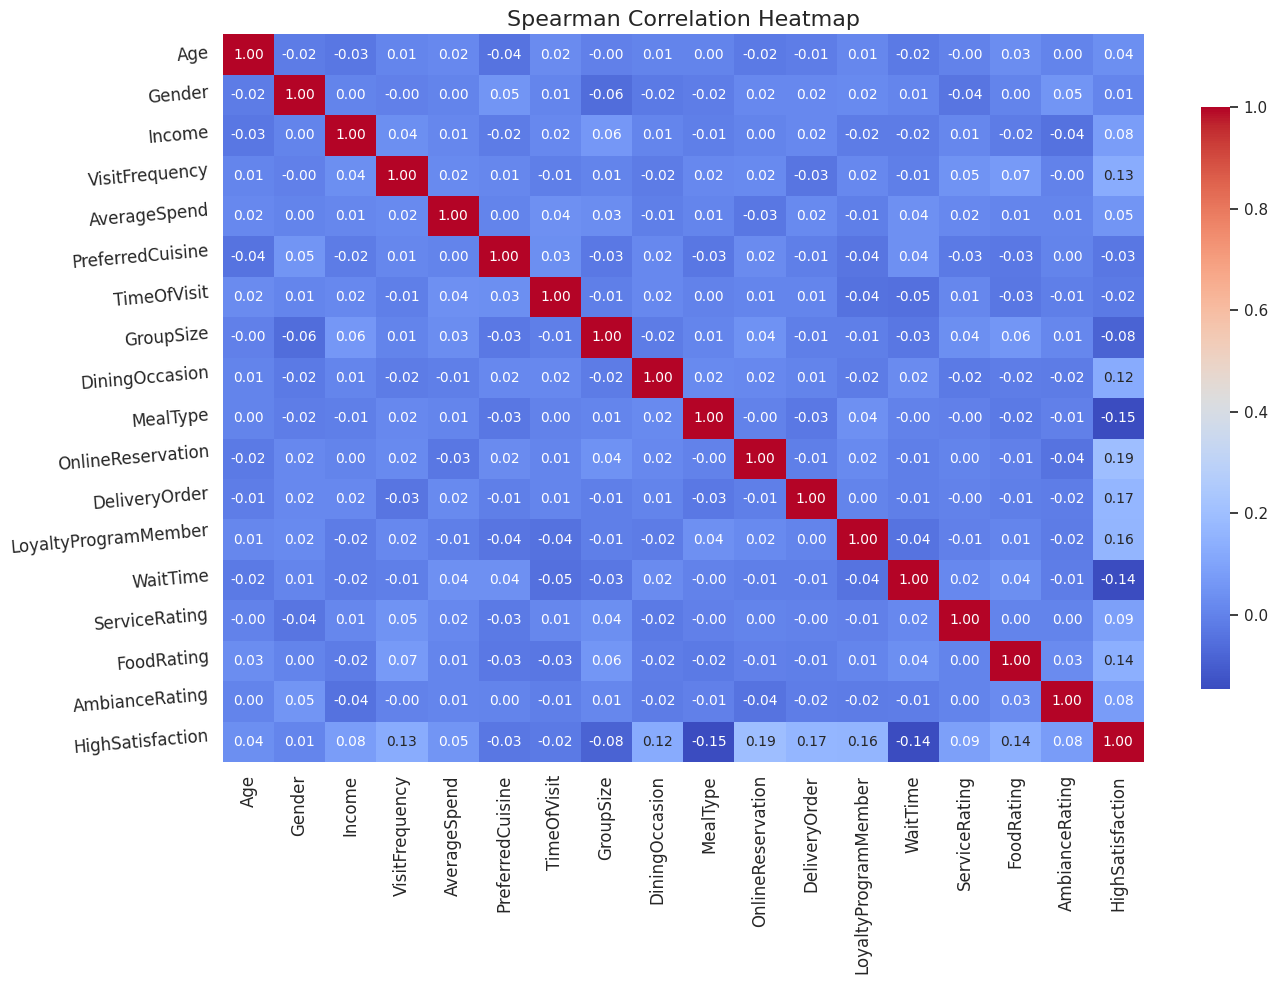

In [ ]:
# Copy the DataFrame and encode categorical columns
df = custmr_satisfaction_df.copy()

# List of categorical columns to encode
categorical_columns = ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit',
                       'DiningOccasion', 'MealType']

# Initializing label encoder
label_encoder = LabelEncoder()

# Applying label encoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Computing the correlation matrices

# Pearson Correlation
plt.figure(figsize=(14, 10))  # Adjust figure size for bigger cells
pearson_corr = df.corr(method='pearson')
sns.heatmap(
    pearson_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',  # Format numbers to 2 decimal places
    annot_kws={'size': 10},  # Size of the numbers in the cells
    cbar_kws={'shrink': .8}  # Shrink the color bar to fit the figure size
)
plt.title('Pearson Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)  # Adjust Size Rotate x-axis ticks
plt.yticks(fontsize=12, rotation=2)  # Adjust Size Rotate y-axis ticks
plt.show()

# Spearman Correlation
plt.figure(figsize=(14, 10))  # Adjust figure size for bigger cells
spearman_corr = df.corr(method='spearman')
sns.heatmap(
    spearman_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',  # Format numbers to 2 decimal places
    annot_kws={'size': 10},  # Size of the numbers in the cells
    cbar_kws={'shrink': .8}  # Shrink the color bar to fit the figure size
)
plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)  # Adjust Size Rotate x-axis ticks
plt.yticks(fontsize=12, rotation=5)  # Adjust Size Rotate y-axis ticks
plt.show()

Text(0, 0.5, 'Correlation')

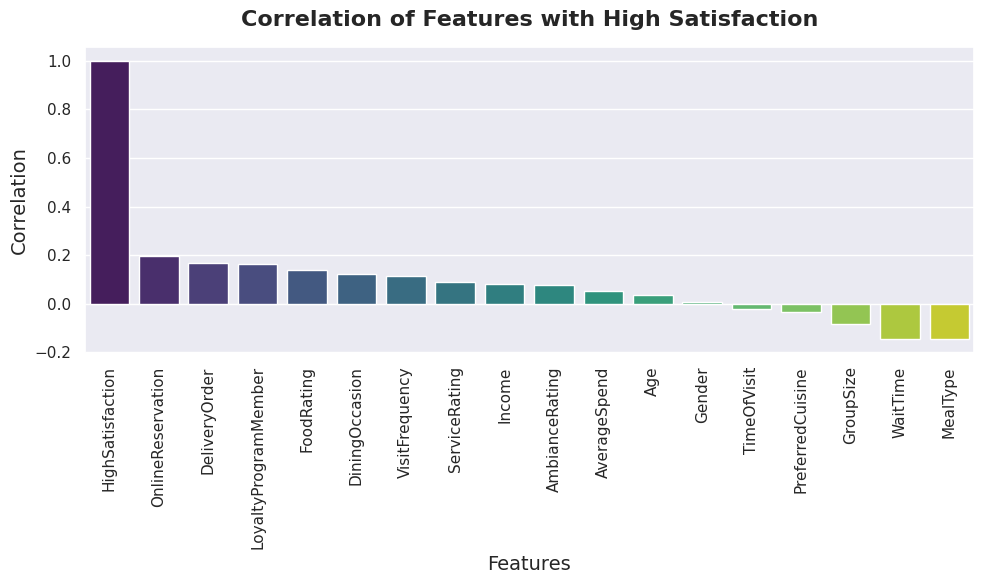

In [ ]:
# Corr with target variable
corr_with_target = df.corr()['HighSatisfaction'].sort_values(ascending=False)

# barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation of Features with High Satisfaction', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation', fontsize=14)

Text(0.5, 1.0, 'Correlation Heatmap with HighSatisfaction')

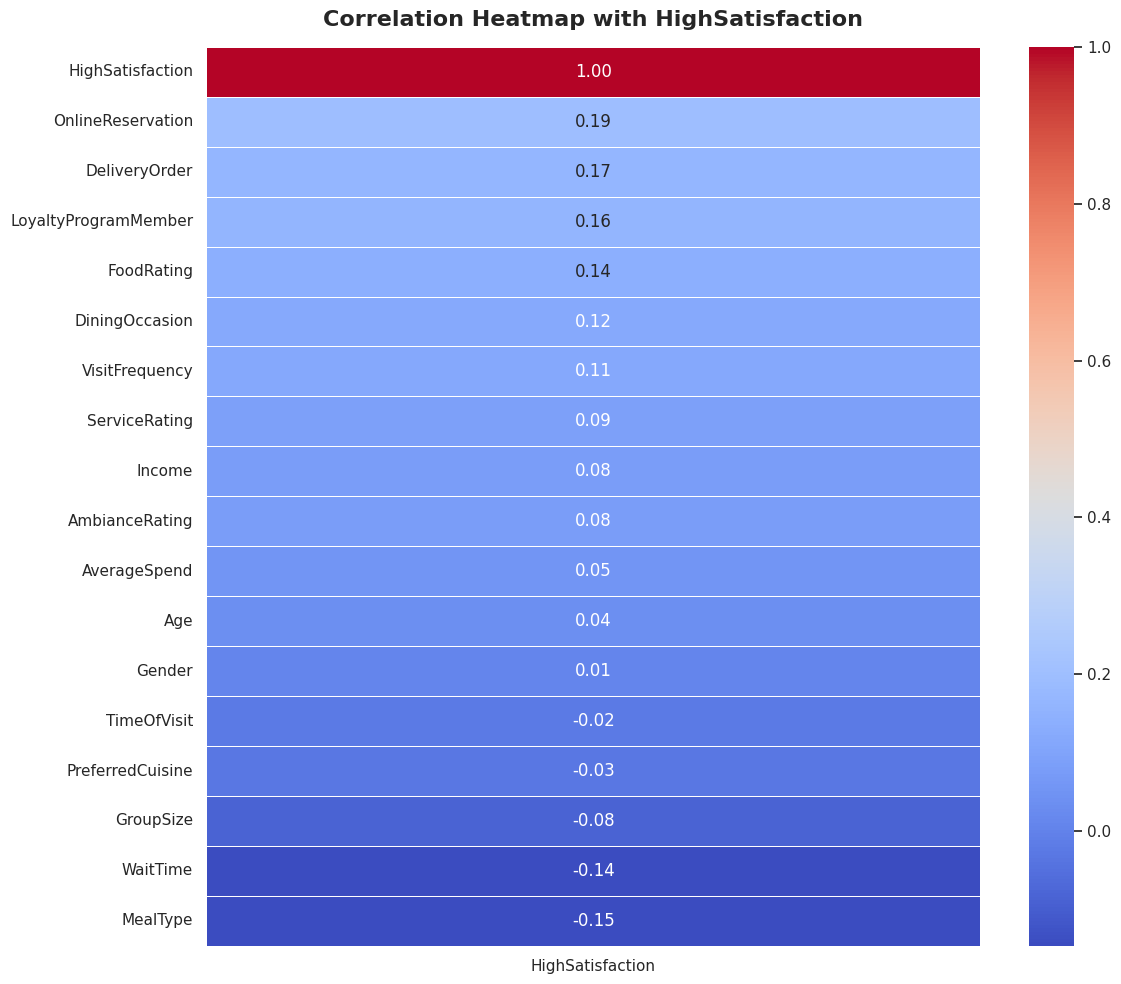

In [ ]:
# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr()[['HighSatisfaction']].sort_values(by='HighSatisfaction', ascending=False),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Heatmap with HighSatisfaction', fontsize=16, fontweight='bold', pad=15)

##### Standarization

---



In [23]:
# Standardizing numerical features

# List of categorical numerical to encode
numerical_features = ['Age', 'Income', 'AverageSpend', 'WaitTime']
# Initializing scaler
num_transformer = StandardScaler()
# Fitting and transforming categorical feature
# custmr_satisfaction_df[numerical_features] = scaler.fit_transform(custmr_satisfaction_df[numerical_features])
for col in custmr_satisfaction_df[numerical_features]:
    custmr_satisfaction_df[[col]] = num_transformer.fit_transform(custmr_satisfaction_df[[col]])
custmr_satisfaction_df.head(3)

Age  Gender    Income VisitFrequency  AverageSpend PreferredCuisine  \
0 -0.590289    Male -0.066593         Weekly     -1.486313          Chinese   
1 -1.659653    Male -1.108162         Rarely      0.186188         American   
2 -0.189277  Female -0.057241         Weekly      0.019761         American   

  TimeOfVisit  GroupSize DiningOccasion  MealType  OnlineReservation  \
0   Breakfast          3       Business  Takeaway                  0   
1      Dinner          1         Casual   Dine-in                  0   
2      Dinner          6    Celebration   Dine-in                  0   

   DeliveryOrder  LoyaltyProgramMember  WaitTime  ServiceRating  FoodRating  \
0              1                     1  0.776385              2           5   
1              0                     0  1.589960              5           5   
2              1                     0  1.076162              3           4   

   AmbianceRating  HighSatisfaction  
0               4                 0  
1               3                 0  
2               5                 0

##### Encoding

  Using one hot encoding for regions

In [29]:
# One-hot encode categorical features:

# Initializing one hot encoder
# ohe = OneHotEncoder(drop='first')
gender_label = OneHotEncoder(drop='first',sparse=False)
freq_label = OneHotEncoder(drop='first',sparse=False)
cuisine_label = OneHotEncoder(drop='first',sparse=False)
time_label = OneHotEncoder(drop='first',sparse=False)
occa_label = OneHotEncoder(drop='first',sparse=False)
meal_label = OneHotEncoder(drop='first',sparse=False)

# # Fitting and transforming categorical features by Applying one hot encoder to categorical variables
custmr_satisfaction_df['Gender'] = gender_label.fit_transform(custmr_satisfaction_df[['Gender']])
custmr_satisfaction_df['VisitFrequency'] = freq_label.fit_transform(custmr_satisfaction_df[['VisitFrequency']])
custmr_satisfaction_df['PreferredCuisine'] = cuisine_label.fit_transform(custmr_satisfaction_df[['PreferredCuisine']])
custmr_satisfaction_df['TimeOfVisit'] = time_label.fit_transform(custmr_satisfaction_df[['TimeOfVisit']])
custmr_satisfaction_df['DiningOccasion'] = occa_label.fit_transform(custmr_satisfaction_df[['DiningOccasion']])
custmr_satisfaction_df['MealType'] = meal_label.fit_transform(custmr_satisfaction_df[['MealType']])
custmr_satisfaction_df.head(3)

Age  Gender    Income  VisitFrequency  AverageSpend  PreferredCuisine  \
0 -0.590289     1.0 -0.066593             0.0     -1.486313               1.0   
1 -1.659653     1.0 -1.108162             0.0      0.186188               0.0   
2 -0.189277     0.0 -0.057241             0.0      0.019761               0.0   

   TimeOfVisit  GroupSize  DiningOccasion  MealType  OnlineReservation  \
0          0.0          3             0.0       1.0                  0   
1          1.0          1             1.0       0.0                  0   
2          1.0          6             0.0       0.0                  0   

   DeliveryOrder  LoyaltyProgramMember  WaitTime  ServiceRating  FoodRating  \
0              1                     1  0.776385              2           5   
1              0                     0  1.589960              5           5   
2              1                     0  1.076162              3           4   

   AmbianceRating  HighSatisfaction  
0               4                 0  
1               3                 0  
2               5                 0

In [30]:
# Combining scaled numerical and encoded categorical features
combined_df = custmr_satisfaction_df.copy()

# Print the combined DataFrame
display(combined_df.head())

Age  Gender    Income  VisitFrequency  AverageSpend  PreferredCuisine  \
0 -0.590289     1.0 -0.066593             0.0     -1.486313               1.0   
1 -1.659653     1.0 -1.108162             0.0      0.186188               0.0   
2 -0.189277     0.0 -0.057241             0.0      0.019761               0.0   
3 -0.055607     1.0  0.284150             0.0     -1.186885               0.0   
4  0.746416     0.0 -0.471175             1.0      0.810200               1.0   

   TimeOfVisit  GroupSize  DiningOccasion  MealType  OnlineReservation  \
0          0.0          3             0.0       1.0                  0   
1          1.0          1             1.0       0.0                  0   
2          1.0          6             0.0       0.0                  0   
3          0.0          1             0.0       0.0                  0   
4          0.0          1             0.0       1.0                  0   

   DeliveryOrder  LoyaltyProgramMember  WaitTime  ServiceRating  FoodRating  \
0              1                     1  0.776385              2           5   
1              0                     0  1.589960              5           5   
2              1                     0  1.076162              3           4   
3              0                     0 -1.313922              4           5   
4              0                     1  0.443125              2           3   

   AmbianceRating  HighSatisfaction  
0               4                 0  
1               3                 0  
2               5                 0  
3               1                 0  
4               5                 0

##### Sampling

In [31]:
# Applying SMOTE to the entire dataset before splitting.
# Although we could done it on train data only

# Preparing features (X) and target (y)
X = combined_df.drop(columns=['HighSatisfaction'])
y = combined_df['HighSatisfaction']

# Initializing and apply SMOTE to the entire dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Converting the resampled data back to a DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled)

# Check class distribution
print("Original class distribution in y:", y.value_counts())
print("Resampled class distribution in y_resampled:", pd.Series(y_resampled).value_counts())

Original class distribution in y: HighSatisfaction
0    1299
1     201
Name: count, dtype: int64
Resampled class distribution in y_resampled: HighSatisfaction
0    1299
1    1299
Name: count, dtype: int64


### Model Development & Evaluation:

In [42]:
# Implementing the logistic regression model

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Training the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

In [43]:
# Prediction on training and testing data
y_train_pred = log_reg.predict(X_train)
y_test_pred= log_reg.predict(X_test)

In [44]:
# Evaluating the model using accuracy and confusion matrix

# Printing metrics for both training and test data
evaluate_model_performance(y_train, y_train_pred, 'Training')
evaluate_model_performance(y_test, y_test_pred, 'Testing')

Training Accuracy: 74.11%
Training Precision: 74.21%
Training Recall: 74.11%

Training Confusion Matrix:

[[730 304]
 [234 810]]

Training Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1034
           1       0.73      0.78      0.75      1044

    accuracy                           0.74      2078
   macro avg       0.74      0.74      0.74      2078
weighted avg       0.74      0.74      0.74      2078

Testing Accuracy: 71.54%
Testing Precision: 71.61%
Testing Recall: 71.54%

Testing Confusion Matrix:

[[185  80]
 [ 68 187]]

Testing Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       265
           1       0.70      0.73      0.72       255

    accuracy                           0.72       520
   macro avg       0.72      0.72      0.72       520
weighted avg       0.72      0.72      0.72       520





---




# **Wrap-Up**



<h1 style="color:#46b0a9; font-family: 'Times New Roman', serif; text-align: center; padding: 20px;">
✨📚 Thanks for visiting my notebook 📚✨
</h1>

I've enjoyed sharing this content with you. If you have any questions, feedback, or would like to dive deeper into any topic covered here, feel free to reach out on monikadurgani@gmail.com.